### Part-I is a programming assignment

#### Importing libraries

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

import datetime

#### Reading and Understanding the data¶

In [2]:
# reading the dataset
data = pd.read_csv("D:\\Roshni\\Post Graduation\\CASE STUDIES\\AdvancedRegression Assignment\\train.csv")

In [3]:
# to display all the columns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [4]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
# checking column headers
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
# checking datatypes for the columns
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [7]:
# checking for number of non null values in the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
# checking for the shape of the data set
data.shape


(1460, 81)

In [9]:
# checking the percentage of nulls in the columns
100*(data.isna().sum()/data.shape[0])

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [10]:
# converting datatype for MSSubClass from int to str
data['MSSubClass'] = data.MSSubClass.astype("str")

# checking number of values for the particular category
data.MSSubClass.value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [11]:
# assigning category names to the MSSubClass column

MSSubClass_map = {"20":"1-STORY 1946 & NEWER ALL STYLES", "30":"1-STORY 1945 & OLDER", "40":"1-STORY W/FINISHED ATTIC ALL AGES",
                  "45":"1-1/2 STORY - UNFINISHED ALL AGES", "50":"1-1/2 STORY FINISHED ALL AGES",
                "60" : "2-STORY 1946 & NEWER","70" : "2-STORY 1945 & OLDER","75":"2-1/2 STORY ALL AGES",
                 "80" : "SPLIT OR MULTI-LEVEL" ,"85" : "SPLIT FOYER" , "90" : "DUPLEX - ALL STYLES AND AGES",
                 "120" : "1-STORY PUD (Planned Unit Development) - 1946 & NEWER", "150":"1-1/2 STORY PUD - ALL AGES",
                 "160" : "2-STORY PUD - 1946 & NEWER", "180" : "PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
                 "190" : "2 FAMILY CONVERSION - ALL STYLES AND AGES"}
data['MSSubClass'] = data['MSSubClass'].map(MSSubClass_map)

data.head()

Id                       MSSubClass MSZoning  LotFrontage  LotArea Street  \
0   1             2-STORY 1946 & NEWER       RL         65.0     8450   Pave   
1   2  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   Pave   
2   3             2-STORY 1946 & NEWER       RL         68.0    11250   Pave   
3   4             2-STORY 1945 & OLDER       RL         60.0     9550   Pave   
4   5             2-STORY 1946 & NEWER       RL         84.0    14260   Pave   

  Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
0   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr   
1   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker   
2   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr   
3   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor   
4   NaN      IR1         Lvl    AllPub       FR2       Gtl      NoRidge   

  Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
0       Norm       Norm     1Fam     2Story            7            5   
1      Feedr       Norm     1Fam     1Story            6            8   
2       Norm       Norm     1Fam     2Story            7            5   
3       Norm       Norm     1Fam     2Story            7            5   
4       Norm       Norm     1Fam     2Story            8            5   

   YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
0       2003          2003     Gable  CompShg     VinylSd     VinylSd   
1       1976          1976     Gable  CompShg     MetalSd     MetalSd   
2       2001          2002     Gable  CompShg     VinylSd     VinylSd   
3       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng   
4       2000          2000     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0    BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1       None         0.0        TA        TA     CBlock       Gd       TA   
2    BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3       None         0.0        TA        TA     BrkTil       TA       Gd   
4    BrkFace       350.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0           No          GLQ         706          Unf           0        150   
1           Gd          ALQ         978          Unf           0        284   
2           Mn          GLQ         486          Unf           0        434   
3           No          ALQ         216          Unf           0        540   
4           Av          GLQ         655          Unf           0        490   

   TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0          856    GasA        Ex          Y      SBrkr       856       854   
1         1262    GasA        Ex          Y      SBrkr      1262         0   
2          920    GasA        Ex          Y      SBrkr       920       866   
3          756    GasA        Gd          Y      SBrkr       961       756   
4         1145    GasA        Ex          Y      SBrkr      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0             3             1          Gd             8        Typ   
1             3             1          TA             6        Typ   
2             3             1          Gd             6        Typ   
3             3             1        

In [12]:
# checking number of values for the particular category
data.MSSubClass.value_counts()

1-STORY 1946 & NEWER ALL STYLES                          536
2-STORY 1946 & NEWER                                     299
1-1/2 STORY FINISHED ALL AGES                            144
1-STORY PUD (Planned Unit Development) - 1946 & NEWER     87
1-STORY 1945 & OLDER                                      69
2-STORY PUD - 1946 & NEWER                                63
2-STORY 1945 & OLDER                                      60
SPLIT OR MULTI-LEVEL                                      58
DUPLEX - ALL STYLES AND AGES                              52
2 FAMILY CONVERSION - ALL STYLES AND AGES                 30
SPLIT FOYER                                               20
2-1/2 STORY ALL AGES                                      16
1-1/2 STORY - UNFINISHED ALL AGES                         12
PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                   10
1-STORY W/FINISHED ATTIC ALL AGES                          4
Name: MSSubClass, dtype: int64

In [13]:
# removing Id column, because we dont get any insights from it as it is just a unique number for every row
data = data.drop(['Id'], axis=1)

In [14]:
data.describe()

LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  \
count  1201.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     70.049958   10516.828082     6.099315     5.575342  1971.267808   
std      24.284752    9981.264932     1.382997     1.112799    30.202904   
min      21.000000    1300.000000     1.000000     1.000000  1872.000000   
25%      59.000000    7553.500000     5.000000     5.000000  1954.000000   
50%      69.000000    9478.500000     6.000000     5.000000  1973.000000   
75%      80.000000   11601.500000     7.000000     6.000000  2000.000000   
max     313.000000  215245.000000    10.000000     9.000000  2010.000000   

       YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  \
count   1460.000000  1452.000000  1460.000000  1460.000000  1460.000000   
mean    1984.865753   103.685262   443.639726    46.549315   567.240411   
std       20.645407   181.066207   456.098091   161.319273   441.866955   
min     1950.000000     0.000000     0.000000     0.000000     0.000000   
25%     1967.000000     0.000000     0.000000     0.000000   223.000000   
50%     1994.000000     0.000000   383.500000     0.000000   477.500000   
75%     2004.000000   166.000000   712.250000     0.000000   808.000000   
max     2010.000000  1600.000000  5644.000000  1474.000000  2336.000000   

       TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  \
count  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean   1057.429452  1162.626712   346.992466      5.844521  1515.463699   
std     438.705324   386.587738   436.528436     48.623081   525.480383   
min       0.000000   334.000000     0.000000      0.000000   334.000000   
25%     795.750000   882.000000     0.000000      0.000000  1129.500000   
50%     991.500000  1087.000000     0.000000      0.000000  1464.000000   
75%    1298.250000  1391.250000   728.000000      0.000000  1776.750000   
max    6110.000000  4692.000000  2065.000000    572.000000  5642.000000   

       BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  \
count   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   
mean       0.425342      0.057534     1.565068     0.382877      2.866438   
std        0.518911      0.238753     0.550916     0.502885      0.815778   
min        0.000000      0.000000     0.000000     0.000000      0.000000   
25%        0.000000      0.000000     1.000000     0.000000      2.000000   
50%        0.000000      0.000000     2.000000     0.000000      3.000000   
75%        1.000000      0.000000     2.000000     1.000000      3.000000   
max        3.000000      2.000000     3.000000     2.000000      8.000000   

       KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars  \
count   1460.000000   1460.000000  1460.000000  1379.000000  1460.000000   
mean       1.046575      6.517808     0.613014  1978.506164     1.767123   
std        0.220338      1.625393     0.644666    24.689725     0.747315   
min        0.000000      2.000000     0.000000  1900.000000     0.000000   
25%        1.000000      5.000000     0.000000  1961.000000     1.000000   
50%        1.000000      6.000000     1.000000  1980.000000     2.000000   
75%        1.000000      7.000000     1.000000  2002.000000     2.000000   
max        3.000000     14.000000     3.000000  2010.000000     4.000000   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    472.980137    94.244521    46.660274      21.954110     3.409589   
std     213.804841   125.338794    66.256028      61.119149    29.317331   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     334.500000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    25.000000       0.000000     0.000000   
75%     576.000000   168.000000    68.000000       0.000000

#### Handling NA values with appropriate information according to the data dictionary

In [15]:
### handling NA
# Repacling NA with "No alley access" as per the data dictioanry
data['Alley'] = data['Alley'].fillna("No alley access")
data.Alley.isnull().sum()

0

In [16]:
# checking number of values for the particular category -'Alley'
data.Alley.value_counts()

No alley access    1369
Grvl                 50
Pave                 41
Name: Alley, dtype: int64

In [17]:
# Repacling NA with "No Basement" as per the data dictioanry
data['BsmtQual'] = data['BsmtQual'].fillna("No Basement")
data.BsmtQual.isnull().sum()

0

In [18]:
# checking number of values for the category -'BsmtQual'
data.BsmtQual.value_counts()

TA             649
Gd             618
Ex             121
No Basement     37
Fa              35
Name: BsmtQual, dtype: int64

In [19]:
# Repacling NA with "No Basement" as per the data dictioanry
data['BsmtCond'] = data['BsmtCond'].fillna("No Basement")
data.BsmtCond.isnull().sum()

0

In [20]:
# checking number of values for the category -'BsmtCond'
data.BsmtCond.value_counts()

TA             1311
Gd               65
Fa               45
No Basement      37
Po                2
Name: BsmtCond, dtype: int64

In [21]:
# Repacling NA with "No Basement" as per the data dictioanry
data['BsmtExposure'] = data['BsmtExposure'].fillna("No Basement")
data.BsmtExposure.isnull().sum()

0

In [22]:
# checking number of values for the category -'BsmtExposure'
data.BsmtExposure.value_counts()

No             953
Av             221
Gd             134
Mn             114
No Basement     38
Name: BsmtExposure, dtype: int64

In [23]:
# Repacling NA with "No Basement" as per the data dictioanry
data['BsmtFinType1'] = data['BsmtFinType1'].fillna("No Basement")
data.BsmtFinType1.isnull().sum()

0

In [24]:
# checking number of values for the category -'BsmtFinType1'
data.BsmtFinType1.value_counts()

Unf            430
GLQ            418
ALQ            220
BLQ            148
Rec            133
LwQ             74
No Basement     37
Name: BsmtFinType1, dtype: int64

In [25]:
# Repacling NA with "No Basement" as per the data dictioanry
data['BsmtFinType2'] = data['BsmtFinType2'].fillna("No Basement")
data.BsmtFinType2.isnull().sum()

0

In [26]:
# checking number of values for the category -'BsmtFinType2'
data.BsmtFinType2.value_counts()

Unf            1256
Rec              54
LwQ              46
No Basement      38
BLQ              33
ALQ              19
GLQ              14
Name: BsmtFinType2, dtype: int64

In [27]:
# Repacling NA with "No Fireplace" as per the data dictioanry
data['FireplaceQu'] = data['FireplaceQu'].fillna("No Fireplace")
data.FireplaceQu.isnull().sum()

0

In [28]:
# checking number of values for the category -'FireplaceQu'
data.FireplaceQu.value_counts()

No Fireplace    690
Gd              380
TA              313
Fa               33
Ex               24
Po               20
Name: FireplaceQu, dtype: int64

In [29]:
# Repacling NA with "No Garage" as per the data dictioanry
data['GarageType'] = data['GarageType'].fillna("No Garage")
data.GarageType.isnull().sum()

0

In [30]:
# checking number of values for the category -'GarageType'
data.GarageType.value_counts()

Attchd       870
Detchd       387
BuiltIn       88
No Garage     81
Basment       19
CarPort        9
2Types         6
Name: GarageType, dtype: int64

In [31]:
# Repacling NA with "No Garage" as per the data dictioanry
data['GarageFinish'] = data['GarageFinish'].fillna("No Garage")
data.GarageFinish.isnull().sum()

0

In [32]:
# checking number of values for the category -'GarageFinish'
data.GarageFinish.value_counts()

Unf          605
RFn          422
Fin          352
No Garage     81
Name: GarageFinish, dtype: int64

In [33]:
# Repacling NA with "No Garage" as per the data dictioanry
data['GarageQual'] = data['GarageQual'].fillna("No Garage")
data.GarageQual.isnull().sum()

0

In [34]:
# checking number of values for the category -'GarageQual'
data.GarageQual.value_counts()

TA           1311
No Garage      81
Fa             48
Gd             14
Ex              3
Po              3
Name: GarageQual, dtype: int64

In [35]:
# Repacling NA with "No Garage" as per the data dictioanry
data['GarageCond'] = data['GarageCond'].fillna("No Garage")
data.GarageCond.isnull().sum()

0

In [36]:
# checking number of values for the category -'GarageCond'
data.GarageCond.value_counts()

TA           1326
No Garage      81
Fa             35
Gd              9
Po              7
Ex              2
Name: GarageCond, dtype: int64

In [37]:
# Repacling NA with "No Pool" as per the data dictioanry
data['PoolQC'] = data['PoolQC'].fillna("No Pool")
data.PoolQC.isnull().sum()

0

In [38]:
# checking number of values for the category -'PoolQC'
data.PoolQC.value_counts()

No Pool    1453
Gd            3
Ex            2
Fa            2
Name: PoolQC, dtype: int64

In [39]:
# Repacling NA with "No Fence" as per the data dictioanry
data['Fence'] = data['Fence'].fillna("No Fence")
data.Fence.isnull().sum()

0

In [40]:
# checking number of values for the category -'Fence'
data.Fence.value_counts()

No Fence    1179
MnPrv        157
GdPrv         59
GdWo          54
MnWw          11
Name: Fence, dtype: int64

In [41]:
# Repacling NA with "No Fence" as per the data dictioanry
data['MiscFeature'] = data['MiscFeature'].fillna("None")
data.MiscFeature.isnull().sum()

0

In [42]:
# checking number of values for the category -'MiscFeature'
data.MiscFeature.value_counts()

None    1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

In [43]:
# Repacling NA with "No Fence" as per the data dictioanry
data['MasVnrType'] = data['MasVnrType'].fillna("None")
data.MiscFeature.isnull().sum()

0

In [44]:
# checking number of values for the category -'MasVnrType'
data.MasVnrType.value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [45]:
# checking the percentage of nulls in the columns
100*(data.isna().sum()/data.shape[0])

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley             0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.000000
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          0.000000
BsmtCond          0.000000
BsmtExposure      0.000000
BsmtFinType1      0.000000
BsmtFinSF1        0.000000
BsmtFinType2      0.000000
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
T

In [46]:
# checking number of nulls
data.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

#### Handling missing values

In [47]:
#### Find the mode for Electrical column to replace the missing values
data.Electrical.mode()[0]

'SBrkr'

In [48]:
# Repacling missing values with 'SBrkr'
data['Electrical'] = data['Electrical'].fillna(data.Electrical.mode()[0])
data.Electrical.isnull().sum()

0

In [49]:
#### Find the mode for GarageYrBlt column to replace the missing values

data.GarageYrBlt.mode()[0]

2005.0

In [50]:
# Repacling missing values with '2005.0'
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(data.GarageYrBlt.mode()[0])
data.GarageYrBlt.isnull().sum()


0

In [51]:
#### Find the mode for LotFrontage column to replace the missing values

data.LotFrontage.mode()[0]

60.0

In [52]:
# Repacling missing values with '60.0'

data['LotFrontage'] = data['LotFrontage'].fillna(data.LotFrontage.mode()[0])
data.LotFrontage.isnull().sum()

0

In [53]:
#### Find the mode for MasVnrArea column to replace the missing values

data.MasVnrArea.mode()[0]

0.0

In [54]:
# Repacling missing values with '0.0'

data['MasVnrArea'] = data['MasVnrArea'].fillna(data.MasVnrArea.mode()[0])
data.LotFrontage.isnull().sum()

0

In [55]:
# checking null values again
data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [56]:
data.shape

(1460, 80)

In [57]:
data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street  \
0             2-STORY 1946 & NEWER       RL         65.0     8450   Pave   
1  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   Pave   
2             2-STORY 1946 & NEWER       RL         68.0    11250   Pave   
3             2-STORY 1945 & OLDER       RL         60.0     9550   Pave   
4             2-STORY 1946 & NEWER       RL         84.0    14260   Pave   

             Alley LotShape LandContour Utilities LotConfig LandSlope  \
0  No alley access      Reg         Lvl    AllPub    Inside       Gtl   
1  No alley access      Reg         Lvl    AllPub       FR2       Gtl   
2  No alley access      IR1         Lvl    AllPub    Inside       Gtl   
3  No alley access      IR1         Lvl    AllPub    Corner       Gtl   
4  No alley access      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
0      CollgCr       Norm       Norm     1Fam     2Story            7   
1      Veenker      Feedr       Norm     1Fam     1Story            6   
2      CollgCr       Norm       Norm     1Fam     2Story            7   
3      Crawfor       Norm       Norm     1Fam     2Story            7   
4      NoRidge       Norm       Norm     1Fam     2Story            8   

   OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st  \
0            5       2003          2003     Gable  CompShg     VinylSd   
1            8       1976          1976     Gable  CompShg     MetalSd   
2            5       2001          2002     Gable  CompShg     VinylSd   
3            5       1915          1970     Gable  CompShg     Wd Sdng   
4            5       2000          2000     Gable  CompShg     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd   
1     MetalSd       None         0.0        TA        TA     CBlock       Gd   
2     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd   
3     Wd Shng       None         0.0        TA        TA     BrkTil       TA   
4     VinylSd    BrkFace       350.0        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0       TA           No          GLQ         706          Unf           0   
1       TA           Gd          ALQ         978          Unf           0   
2       TA           Mn          GLQ         486          Unf           0   
3       Gd           No          ALQ         216          Unf           0   
4       TA           Av          GLQ         655          Unf           0   

   BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  \
0        150          856    GasA        Ex          Y      SBrkr       856   
1        284         1262    GasA        Ex          Y      SBrkr      1262   
2        434          920    GasA        Ex          Y      SBrkr       920   
3        540          756    GasA        Gd          Y      SBrkr       961   
4        490         1145    GasA        Ex          Y      SBrkr      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0         1             3             1          Gd             8        Typ   
1         0             3             1          TA             6        Typ   
2         1             3             1          Gd             6        Typ   
3         0             3           

In [58]:
# Seggregating the columns into Continuous and Categorical 

cont_cols=["LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF",
          "LowQualFinSF","GrLivArea","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch",
            "PoolArea",
          "MiscVal","SalePrice"] 

cat_cols=["MSSubClass","MSZoning","Street","Alley","LotShape","LandContour","LotConfig","Utilities","LandSlope","Neighborhood",
          "Condition1","Condition2","BldgType","HouseStyle","OverallQual","OverallCond","YearBuilt","YearRemodAdd","RoofStyle",
         "RoofMatl","Exterior1st","Exterior2nd","MasVnrType","ExterQual","ExterCond","Foundation","BsmtQual","BsmtCond",
         "BsmtExposure","BsmtFinType1","BsmtFinType2","Heating","HeatingQC","CentralAir","Electrical","BsmtFullBath","BsmtHalfBath",
          "FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","KitchenQual","TotRmsAbvGrd","Fireplaces","GarageYrBlt",
          "Functional","GarageCars","MoSold","YrSold",
         "FireplaceQu","GarageType","GarageFinish","GarageQual","GarageCond","PavedDrive","PoolQC","Fence","MiscFeature",
         "SaleType","SaleCondition"]
len(cont_cols)+len(cat_cols)

80

### UNIVARIATE ANALYSIS

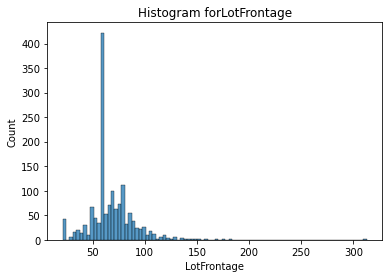

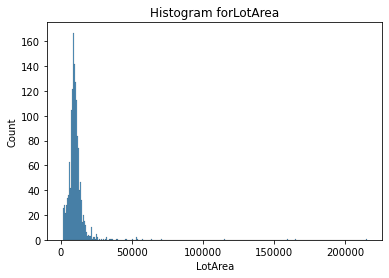

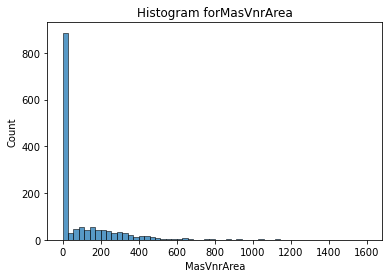

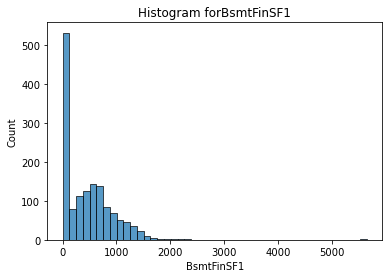

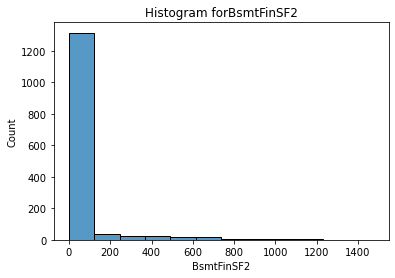

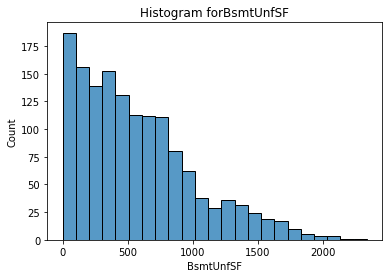

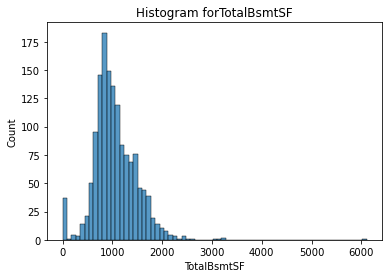

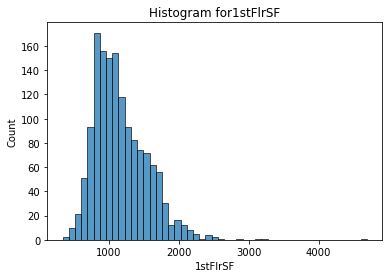

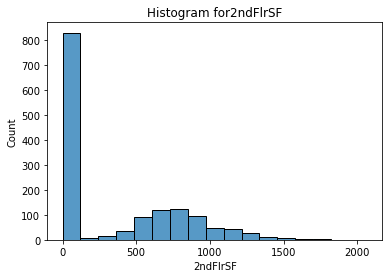

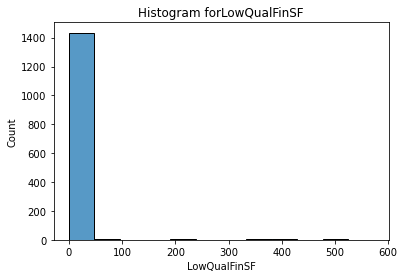

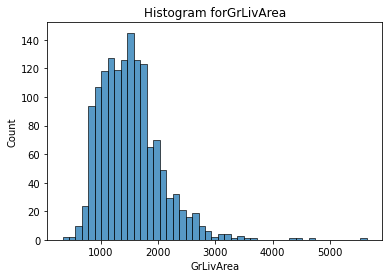

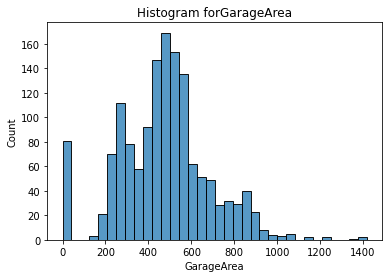

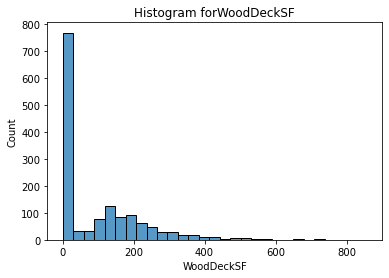

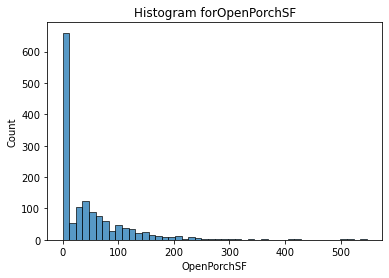

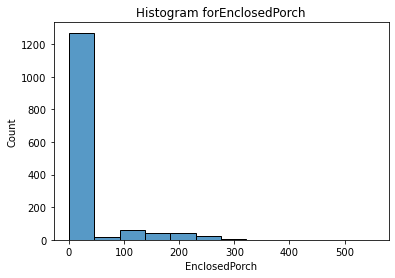

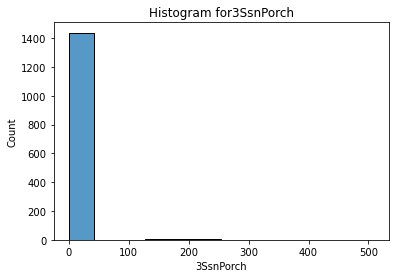

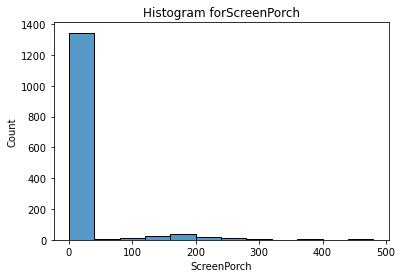

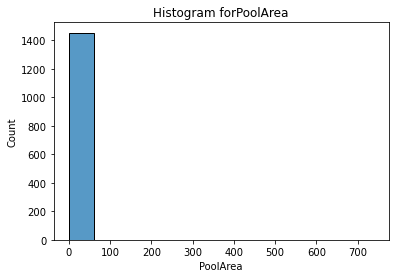

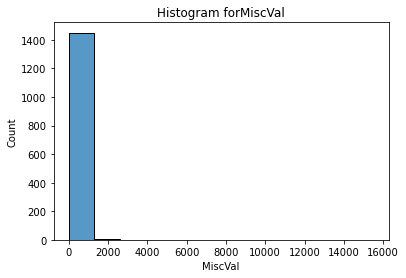

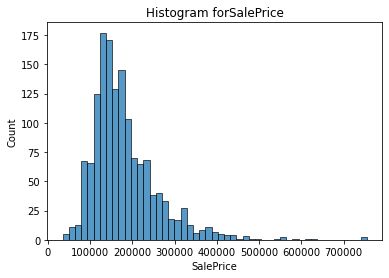

In [59]:
for i in cont_cols:
    sns.histplot(data[i])
    plt.title("Histogram for" +i)
    plt.show()

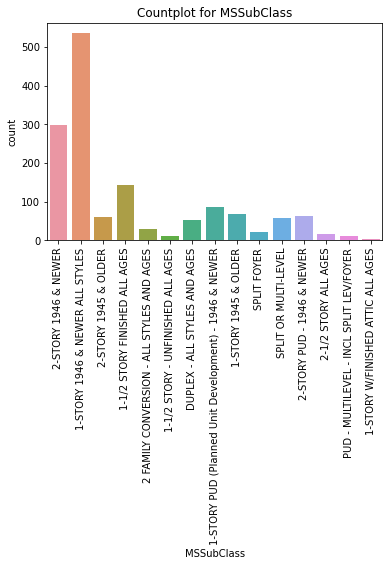

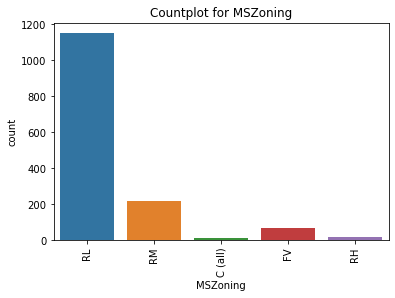

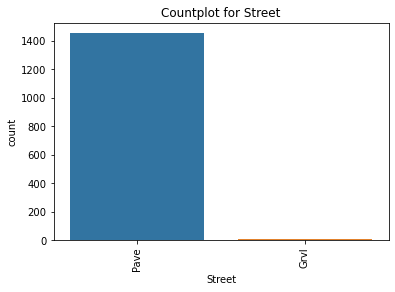

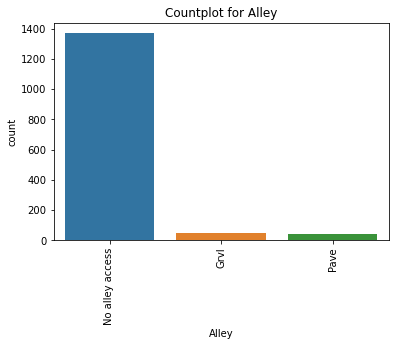

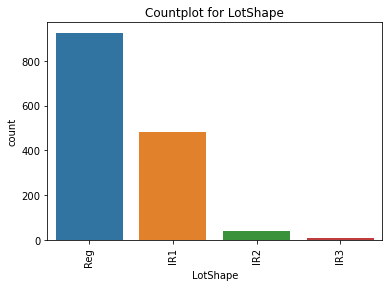

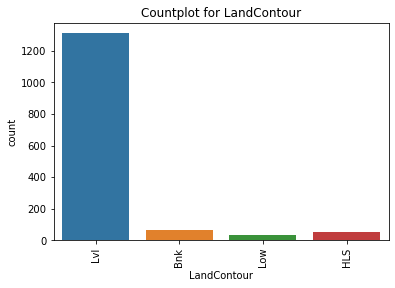

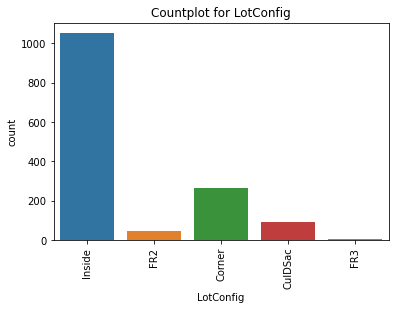

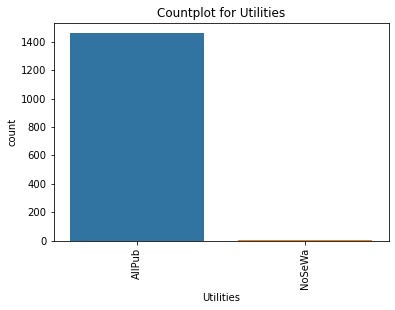

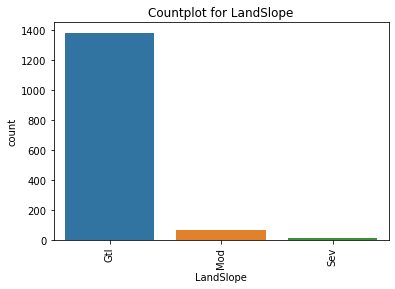

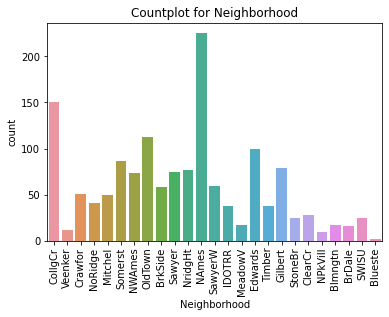

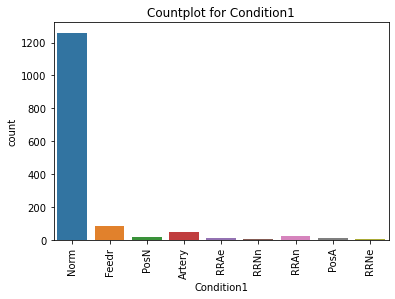

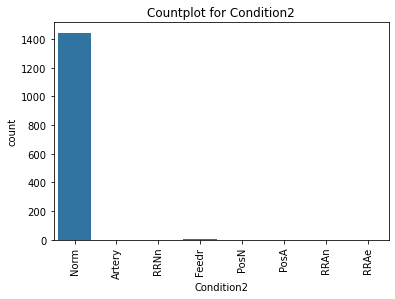

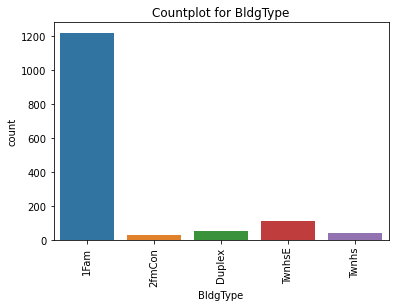

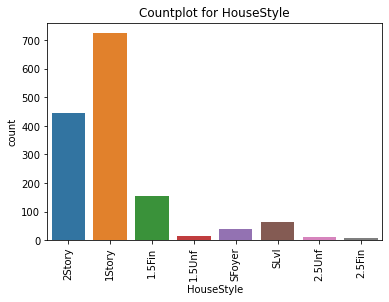

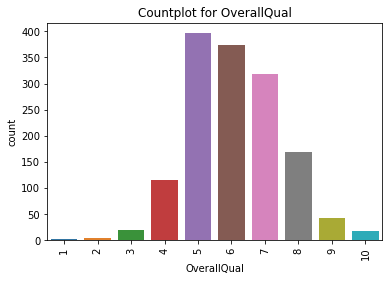

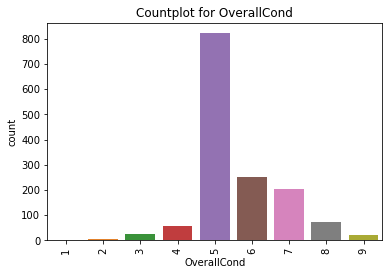

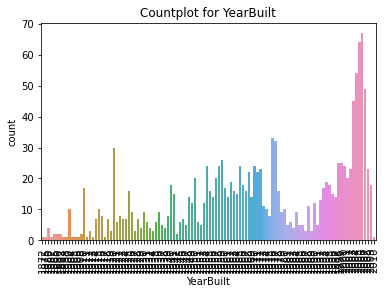

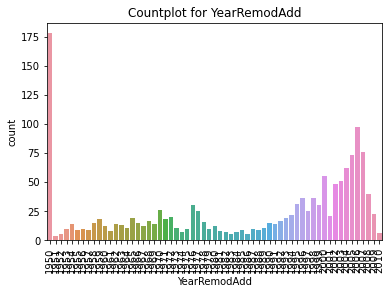

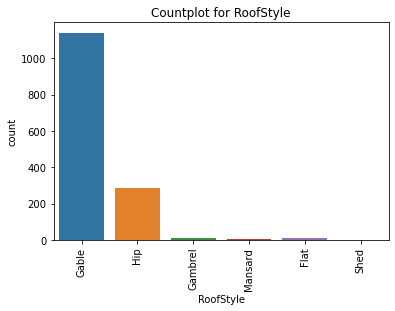

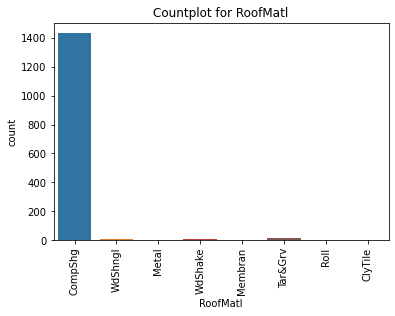

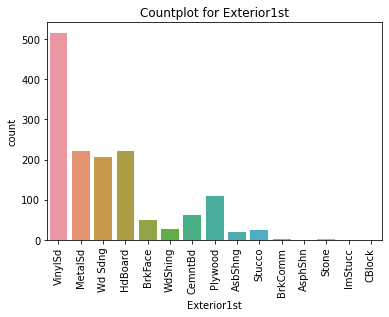

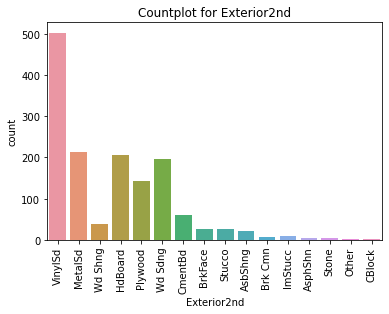

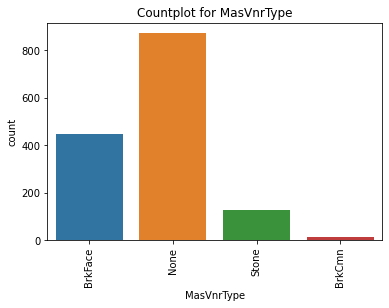

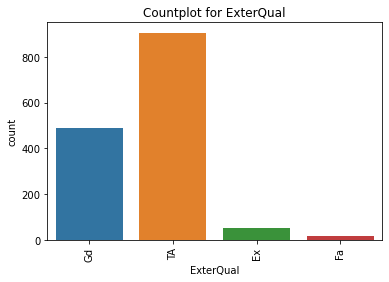

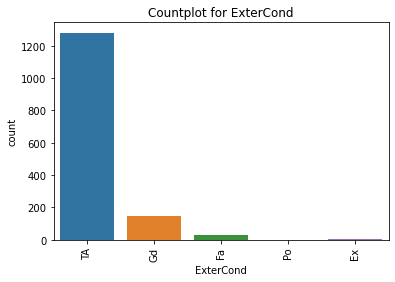

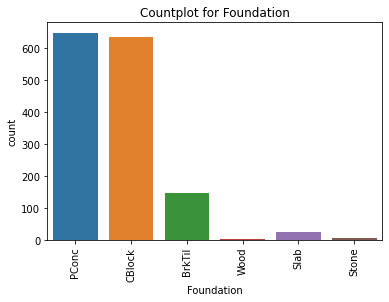

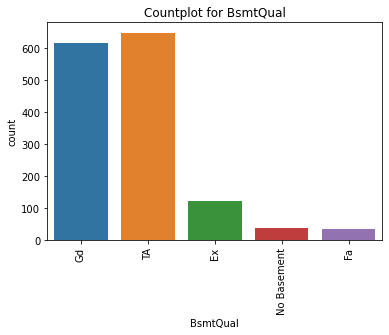

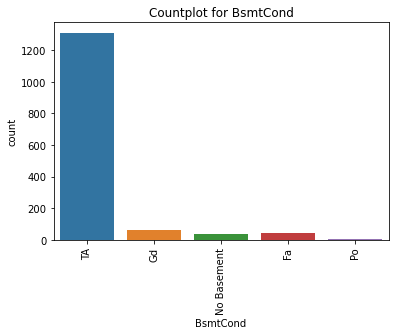

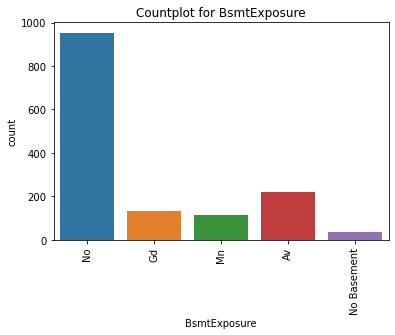

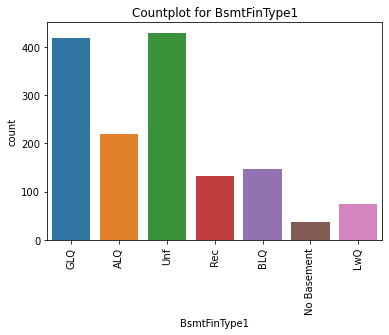

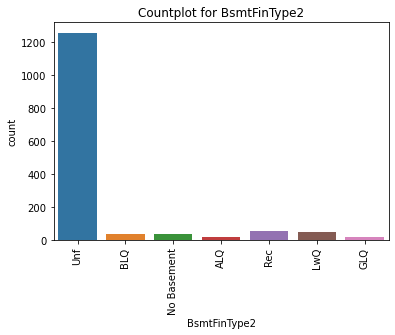

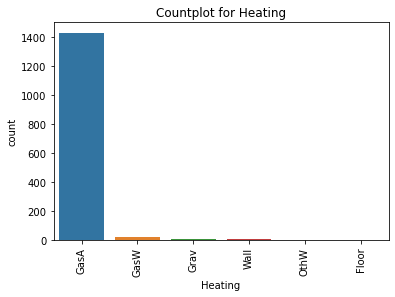

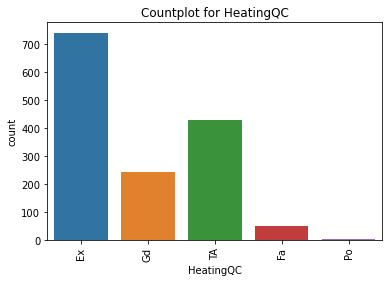

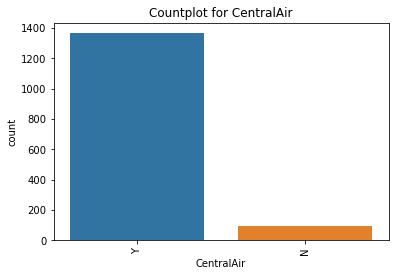

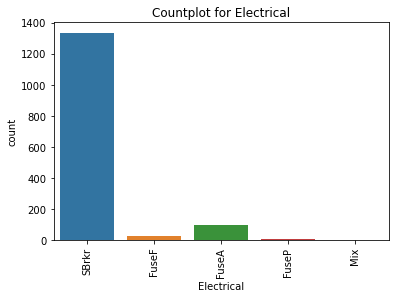

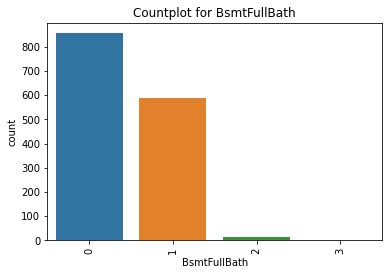

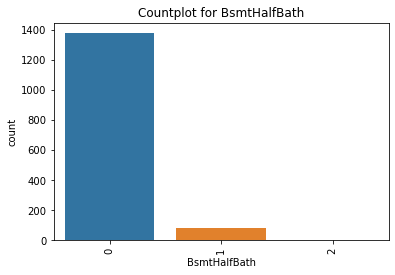

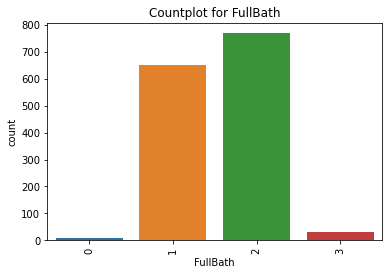

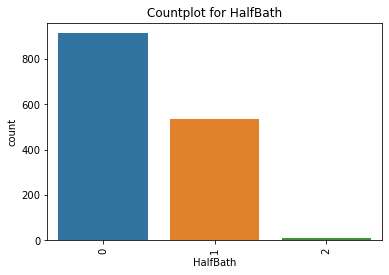

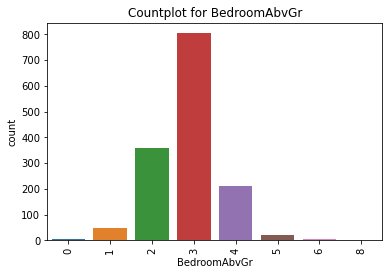

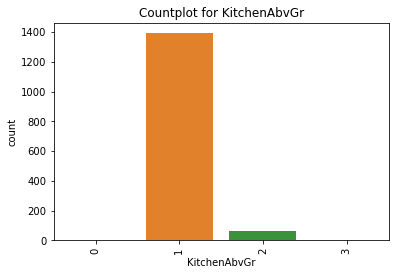

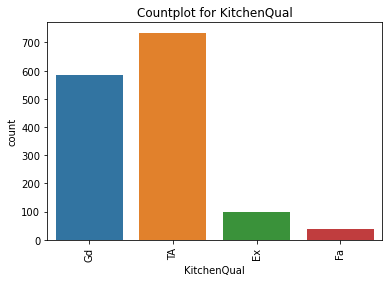

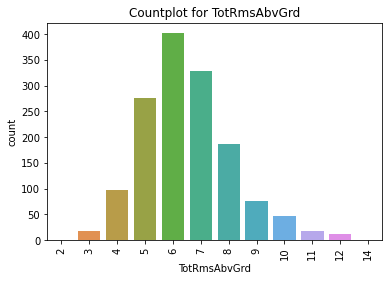

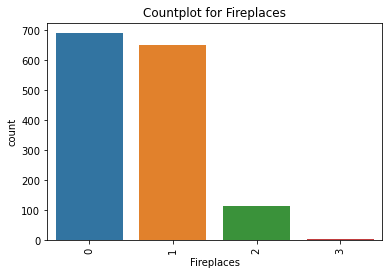

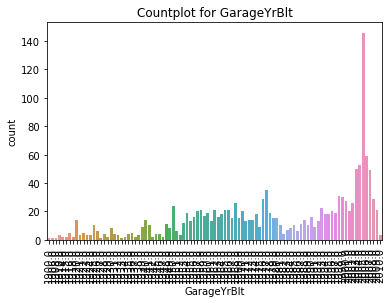

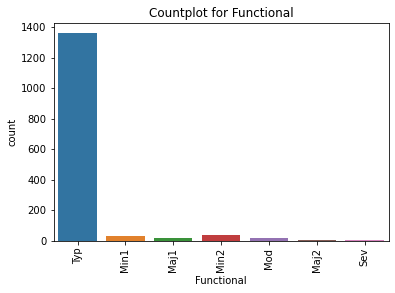

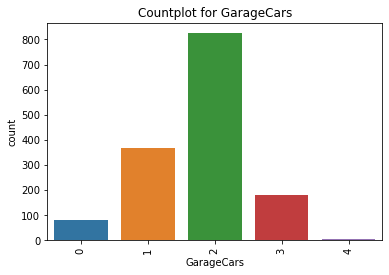

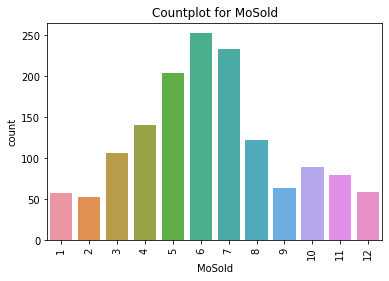

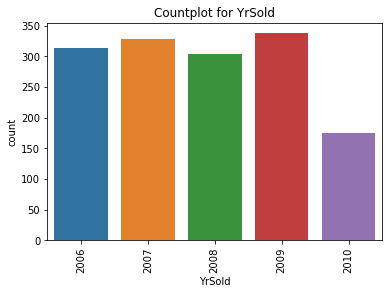

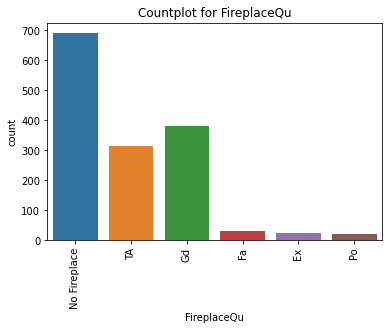

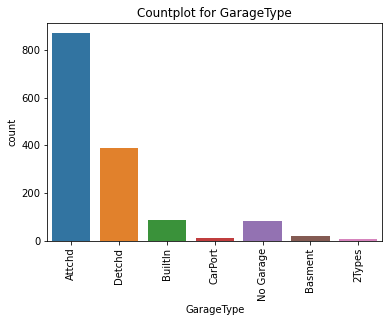

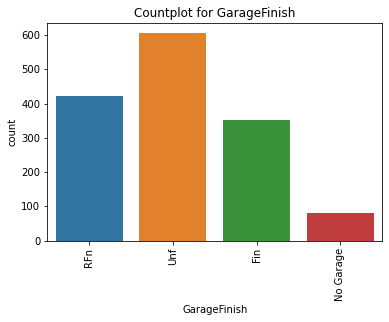

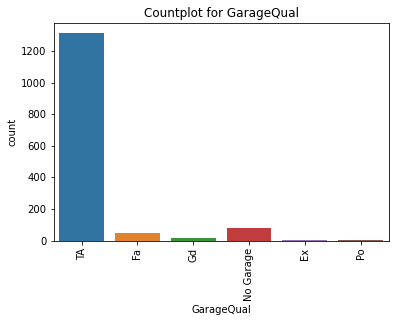

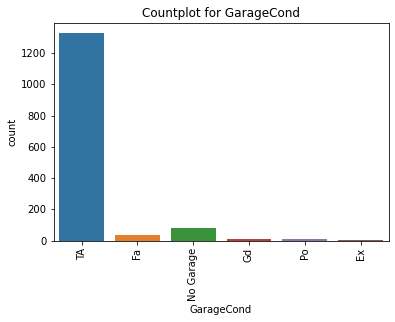

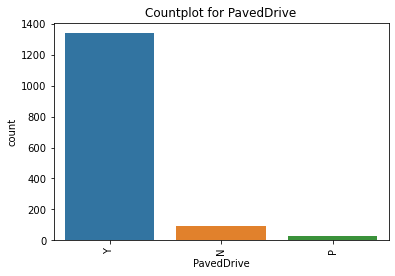

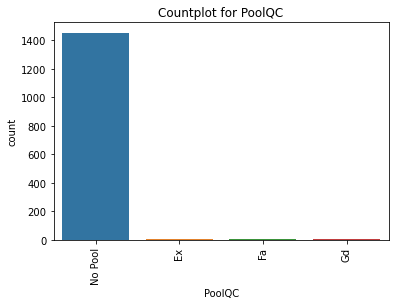

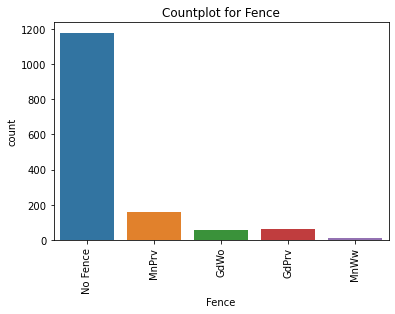

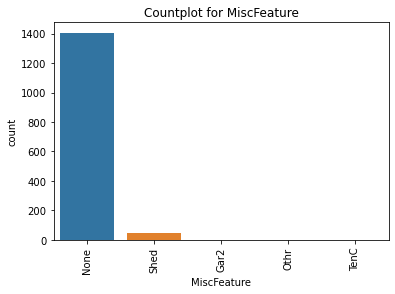

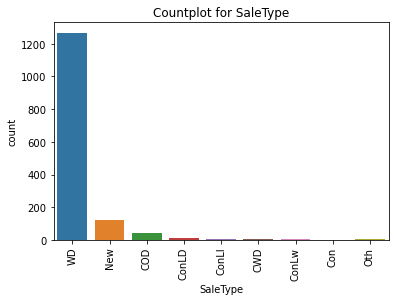

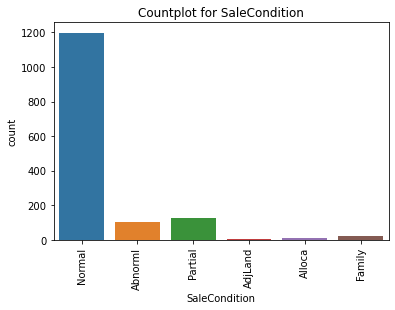

In [60]:
for i in cat_cols:
    sns.countplot(data[i])
    plt.title("Countplot for " +i)
    plt.xticks(rotation = 90)
    plt.show()

### Bivariate Analysis

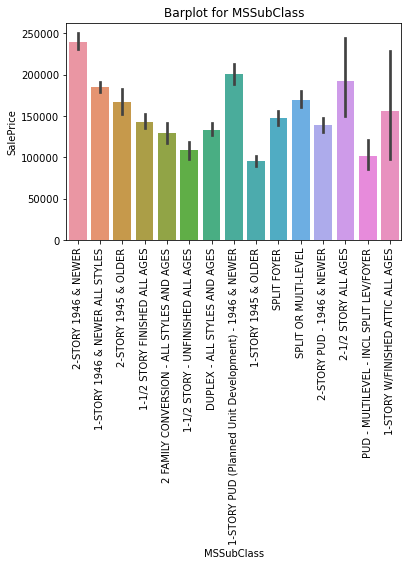

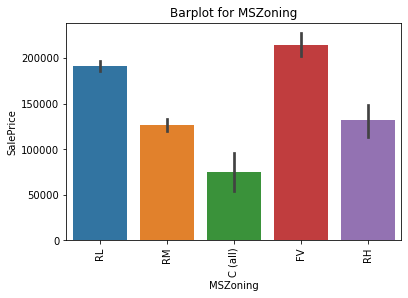

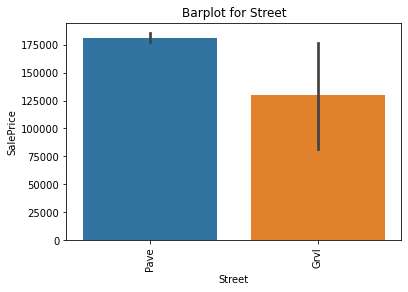

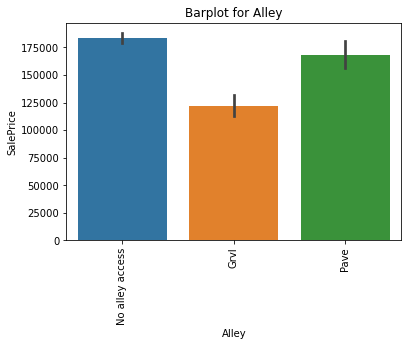

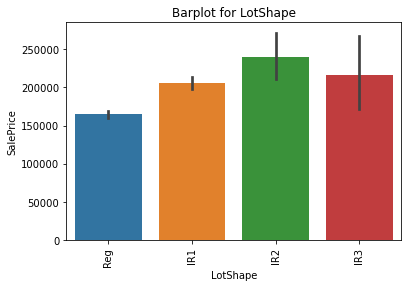

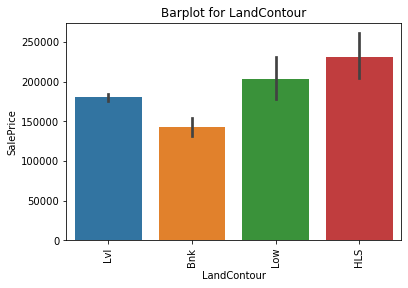

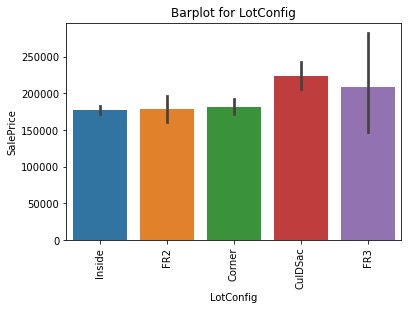

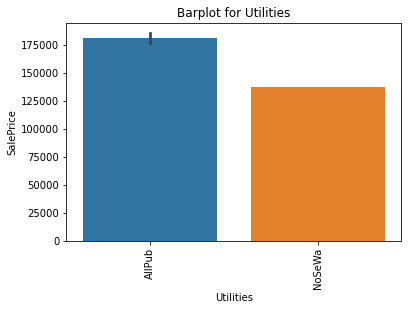

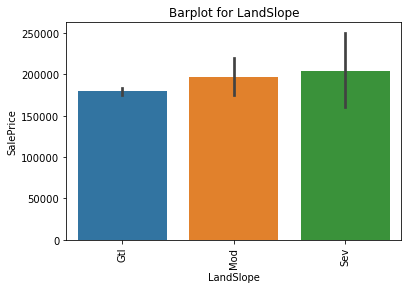

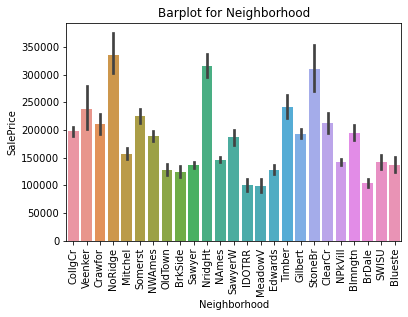

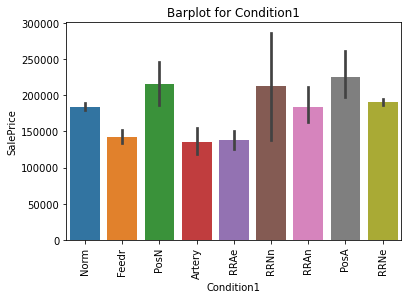

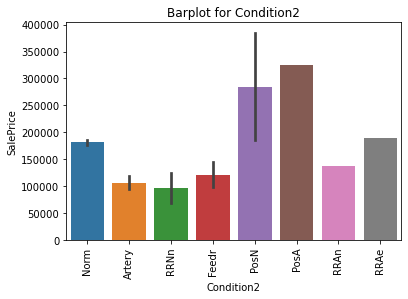

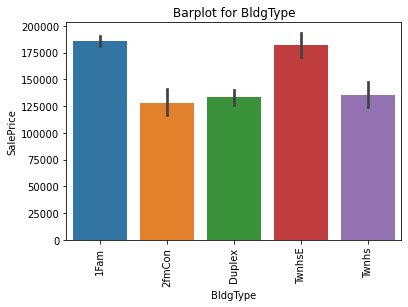

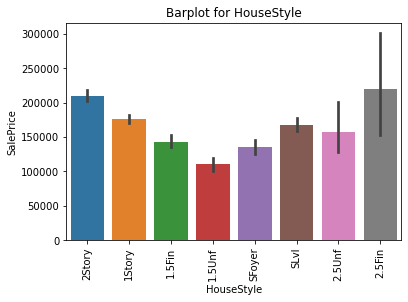

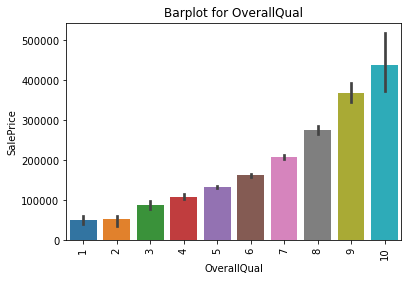

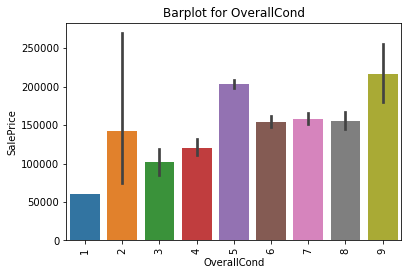

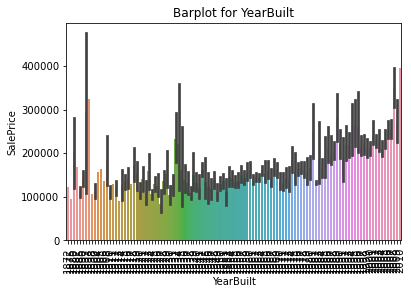

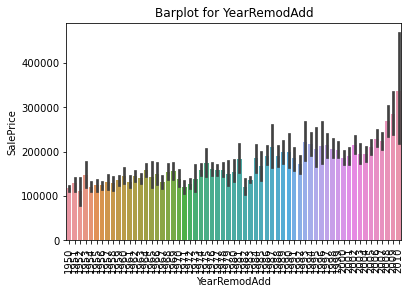

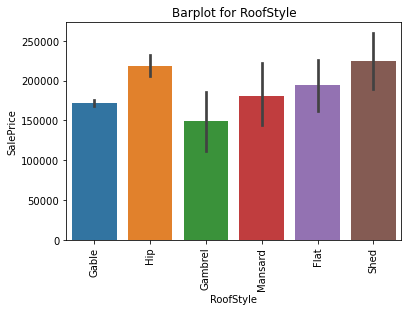

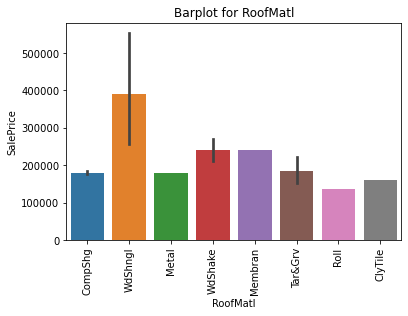

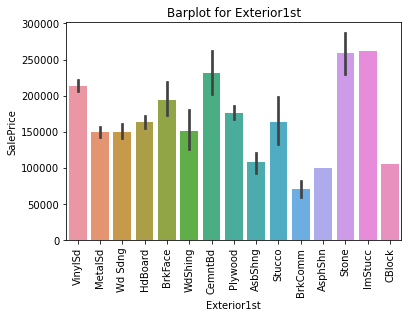

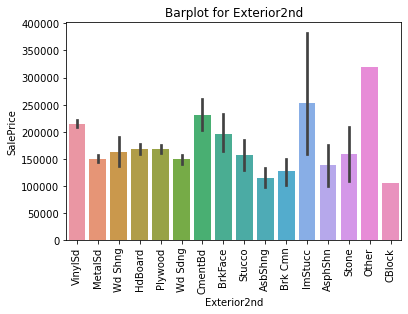

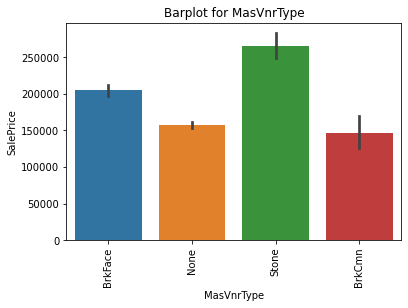

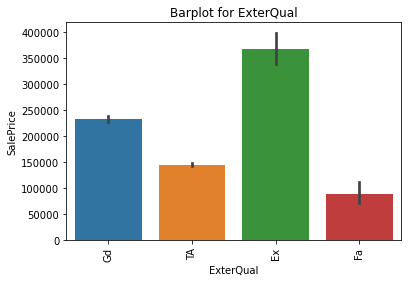

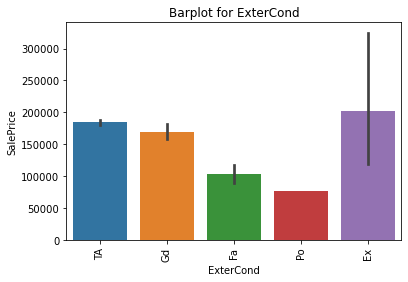

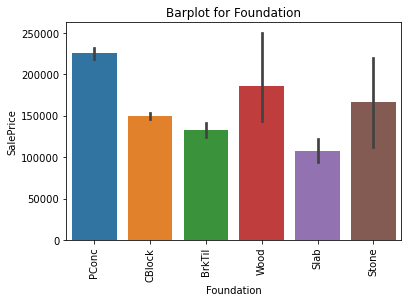

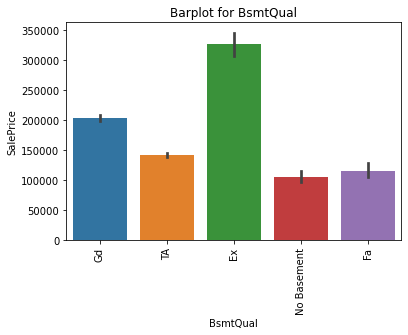

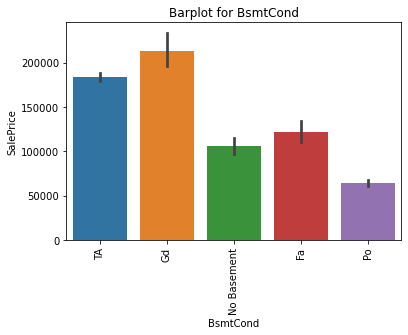

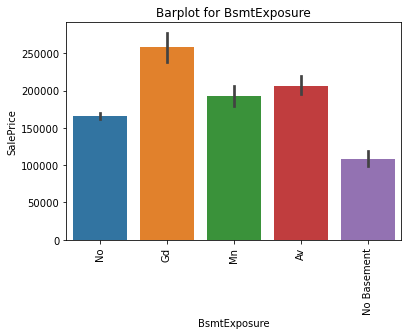

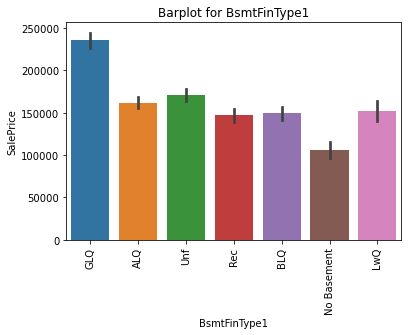

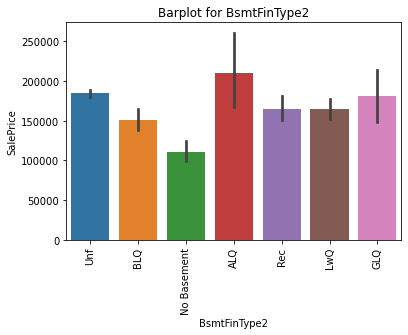

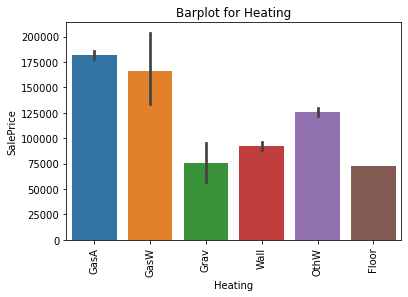

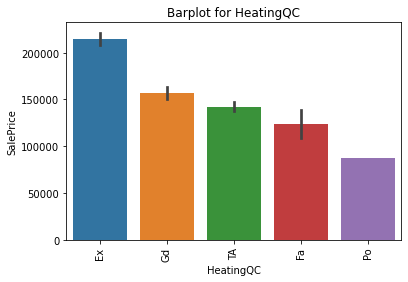

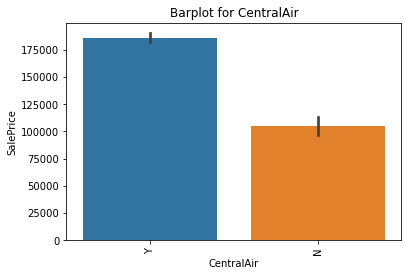

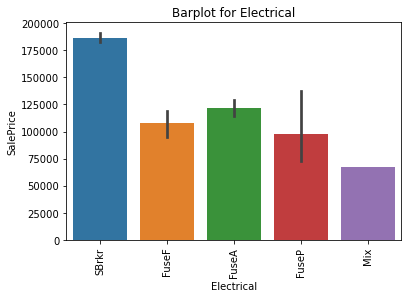

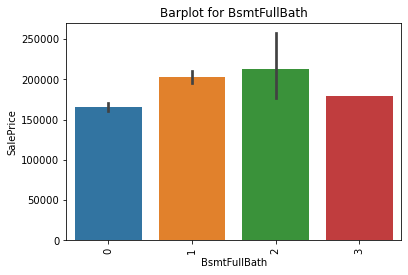

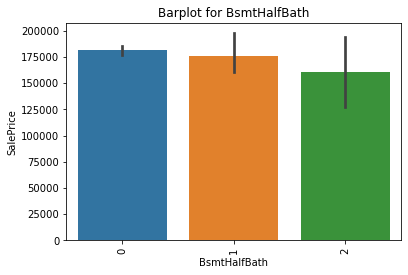

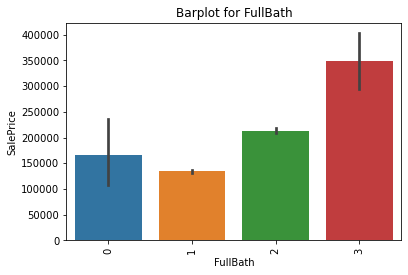

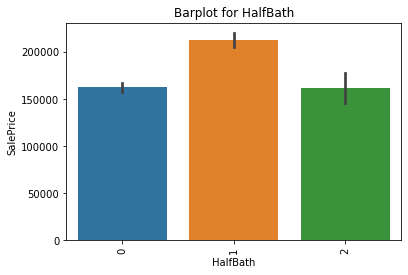

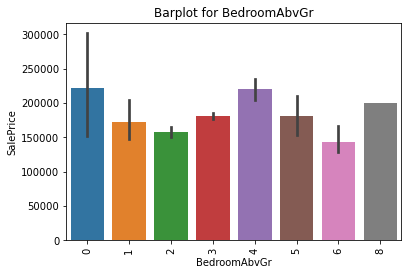

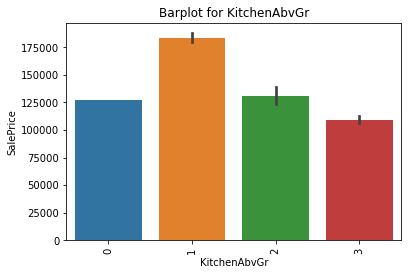

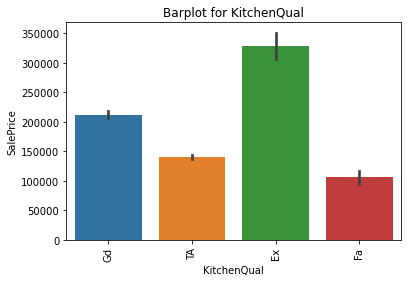

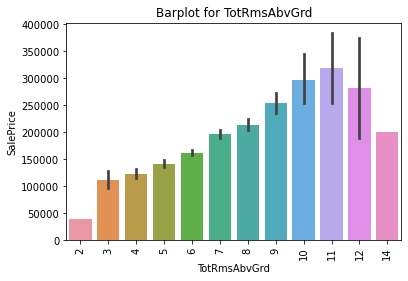

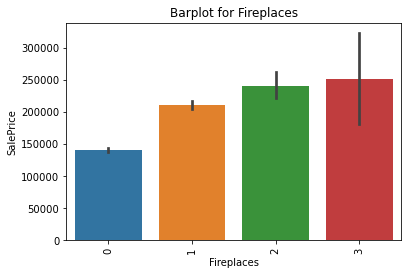

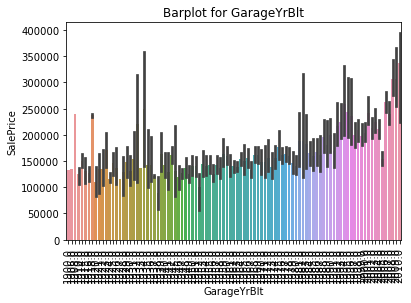

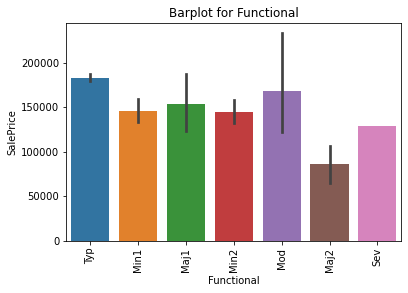

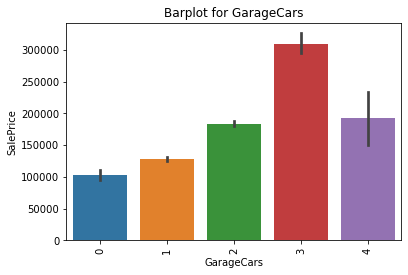

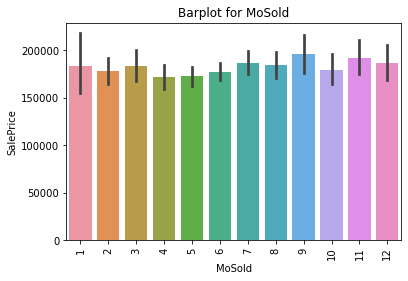

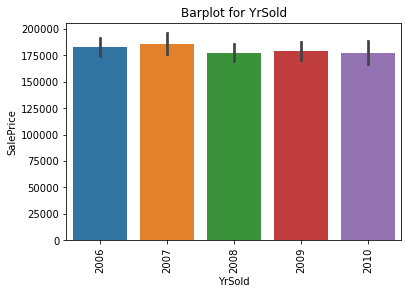

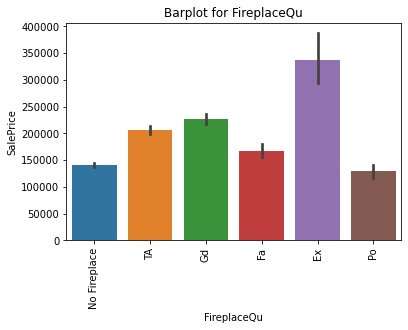

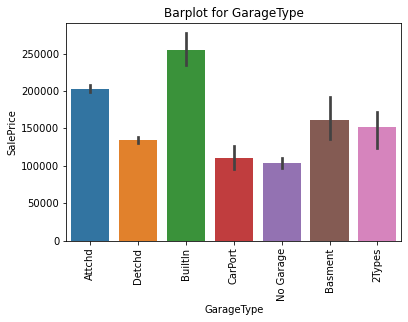

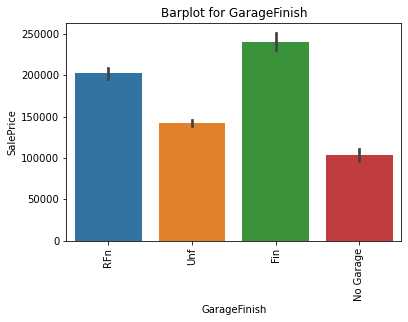

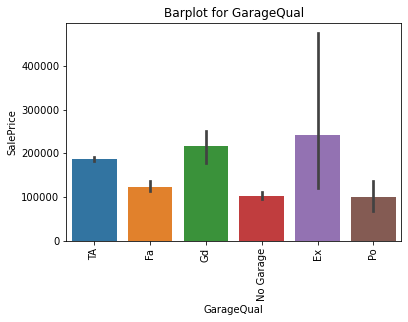

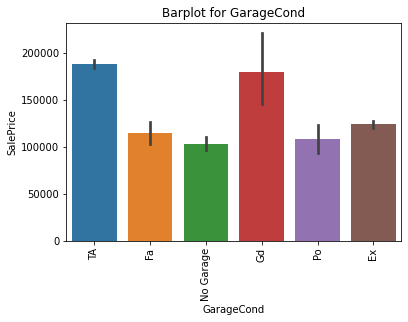

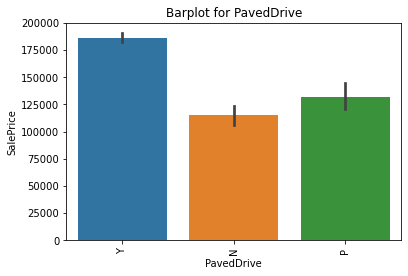

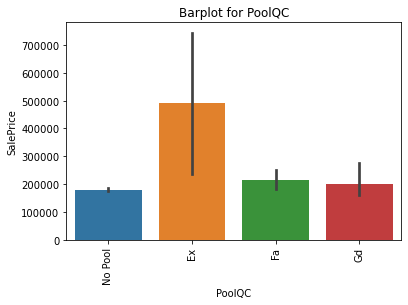

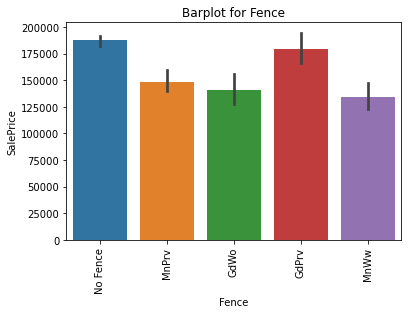

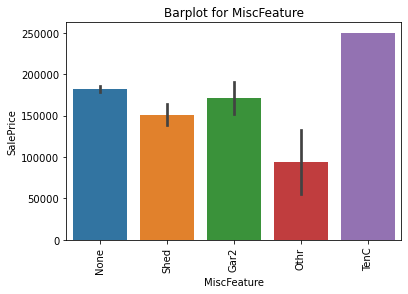

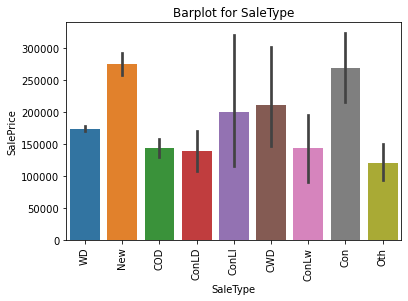

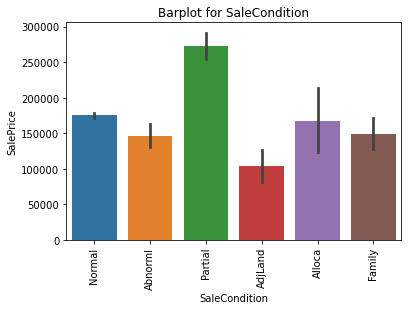

In [61]:
for i in cat_cols:
    sns.barplot(x=data[i],y=data["SalePrice"])
    plt.title("Barplot for "+i)
    plt.xticks(rotation=90)
    plt.show()

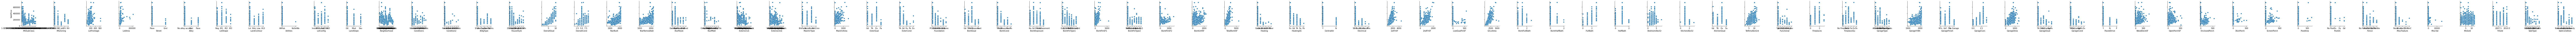

In [62]:
pp = sns.pairplot(data=data,
                  x_vars=['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
                  y_vars=['SalePrice'])

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [64]:
# from above pair plot graph we can drop the below columns as it doesnt have much relation to the 'SalePrice' 

data = data.drop(['YrSold','MoSold','MiscVal','MiscFeature','PoolQC','PoolArea'], axis=1)

In [65]:
# from continuous hist plots graphs below columns are dropped as it doesnt have much relation to the 'SalePrice' 

data = data.drop(['BsmtFinSF1','LowQualFinSF','3SsnPorch','ScreenPorch'], axis=1)

In [66]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'Enc

In [67]:
# from categorical hist plots dropping the MSSubClass column
data = data.drop(['MSSubClass'], axis=1)

In [68]:
# from continuous hist plots graphs below columns are dropped as it doesnt have much relation to the 'SalePrice' 

data = data.drop(['Street', 'Alley',
       'Utilities','LandSlope',
       'Condition2',
       'RoofMatl','BsmtFinType2',
       'Heating',
       'BsmtHalfBath', 'KitchenAbvGr',
       'Functional','GarageQual', 'GarageCond'], axis=1)

In [69]:
data.shape

(1460, 56)

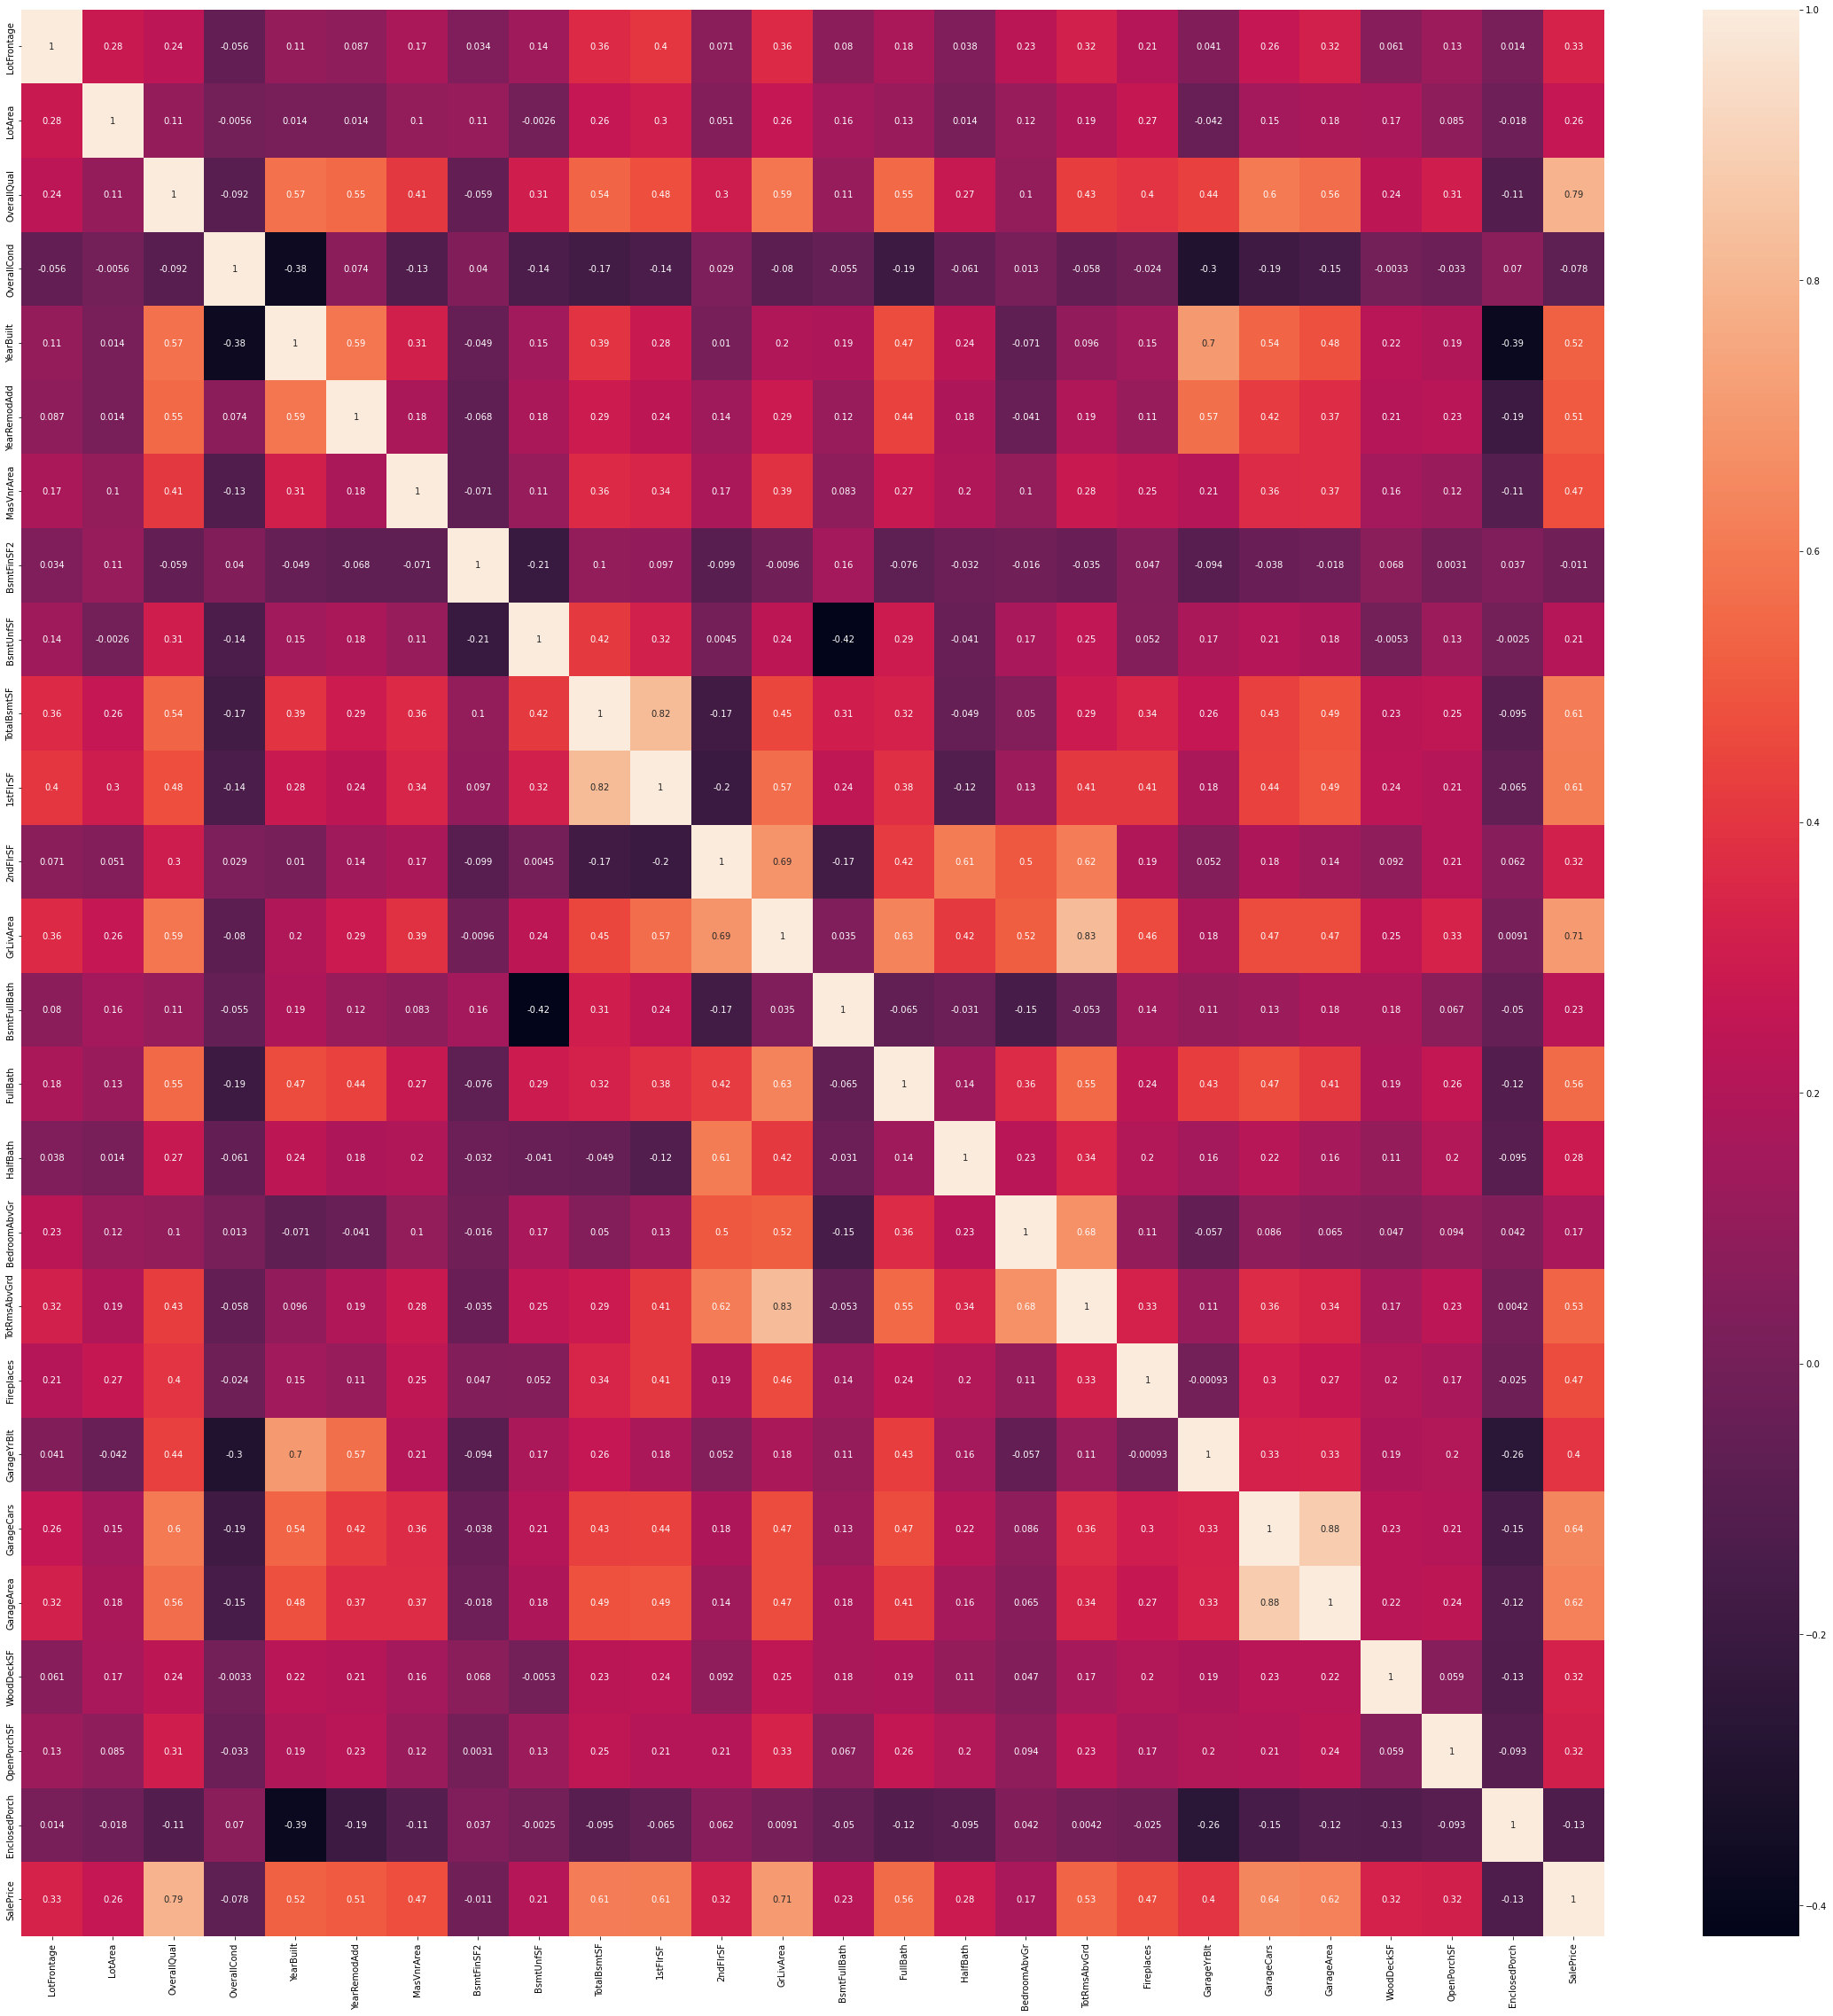

In [70]:
# Visualising the heatmap for correlation 
plt.figure(figsize = (40,40))
sns.heatmap(data.corr(), annot= True)
plt.show()

In [71]:
# Create correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Drop features 
data.drop(to_drop, axis=1, inplace=True)

In [72]:
# checking the columns which have more corelation 
to_drop

['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea']

In [73]:
# from continuous hist plots graphs below columns are dropped as it doesnt have much relation to the 'SalePrice' 

data = data.drop(['LandContour','Condition1','BsmtCond','CentralAir','Electrical','PavedDrive'], axis=1)

In [74]:
data.shape

(1460, 47)

In [75]:
data.head()

MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood BldgType  \
0       RL         65.0     8450      Reg    Inside      CollgCr     1Fam   
1       RL         80.0     9600      Reg       FR2      Veenker     1Fam   
2       RL         68.0    11250      IR1    Inside      CollgCr     1Fam   
3       RL         60.0     9550      IR1    Corner      Crawfor     1Fam   
4       RL         84.0    14260      IR1       FR2      NoRidge     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       None         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtExposure BsmtFinType1  BsmtFinSF2  BsmtUnfSF  \
0      PConc       Gd           No          GLQ           0        150   
1     CBlock       Gd           Gd          ALQ           0        284   
2      PConc       Gd           Mn          GLQ           0        434   
3     BrkTil       TA           No          ALQ           0        540   
4      PConc       Gd           Av          GLQ           0        490   

   TotalBsmtSF HeatingQC  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  \
0          856        Ex       854       1710             1         2   
1         1262        Ex         0       1262             0         2   
2          920        Ex       866       1786             1         2   
3          756        Gd       756       1717             1         1   
4         1145        Ex      1053       2198             1         2   

   HalfBath  BedroomAbvGr KitchenQual  Fireplaces   FireplaceQu GarageType  \
0         1             3          Gd           0  No Fireplace     Attchd   
1         0             3          TA           1            TA     Attchd   
2         1             3          Gd           1            TA     Attchd   
3         0             3          Gd           1            Gd     Detchd   
4         1             4          Gd           1            TA     Attchd   

   GarageYrBlt GarageFinish  GarageCars  WoodDeckSF  OpenPorchSF  \
0       2003.0          RFn           2           0           61   
1       1976.0          RFn           2         298            0   
2       2001.0          RFn           2           0           42   
3       1998.0          Unf           3           0           35   
4       2000.0          RFn           3         192           84   

   EnclosedPorch     Fence SaleType SaleCondition  SalePrice  
0              0  No Fence       WD        Normal     208500  
1              0  No Fence       WD        Normal     181500  
2              0  No Fence       WD        Normal     223500  
3            272  No Fence       WD       Abnorml     140000  
4              0  No Fence       WD        Normal     250000

#### Creating the Derived Colum 'AgeOfBuilding' from the 'YearBuilt' column

In [76]:
### calculate the age of the building
now = datetime.datetime.now().year

data["AgeOfBuilding"] = now - data['YearBuilt']  # substract to get the year delta
data["AgeOfBuilding"].head()

0     19
1     46
2     21
3    107
4     22
Name: AgeOfBuilding, dtype: int64

In [77]:
data.head()

MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood BldgType  \
0       RL         65.0     8450      Reg    Inside      CollgCr     1Fam   
1       RL         80.0     9600      Reg       FR2      Veenker     1Fam   
2       RL         68.0    11250      IR1    Inside      CollgCr     1Fam   
3       RL         60.0     9550      IR1    Corner      Crawfor     1Fam   
4       RL         84.0    14260      IR1       FR2      NoRidge     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       None         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtExposure BsmtFinType1  BsmtFinSF2  BsmtUnfSF  \
0      PConc       Gd           No          GLQ           0        150   
1     CBlock       Gd           Gd          ALQ           0        284   
2      PConc       Gd           Mn          GLQ           0        434   
3     BrkTil       TA           No          ALQ           0        540   
4      PConc       Gd           Av          GLQ           0        490   

   TotalBsmtSF HeatingQC  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  \
0          856        Ex       854       1710             1         2   
1         1262        Ex         0       1262             0         2   
2          920        Ex       866       1786             1         2   
3          756        Gd       756       1717             1         1   
4         1145        Ex      1053       2198             1         2   

   HalfBath  BedroomAbvGr KitchenQual  Fireplaces   FireplaceQu GarageType  \
0         1             3          Gd           0  No Fireplace     Attchd   
1         0             3          TA           1            TA     Attchd   
2         1             3          Gd           1            TA     Attchd   
3         0             3          Gd           1            Gd     Detchd   
4         1             4          Gd           1            TA     Attchd   

   GarageYrBlt GarageFinish  GarageCars  WoodDeckSF  OpenPorchSF  \
0       2003.0          RFn           2           0           61   
1       1976.0          RFn           2         298            0   
2       2001.0          RFn           2           0           42   
3       1998.0          Unf           3           0           35   
4       2000.0          RFn           3         192           84   

   EnclosedPorch     Fence SaleType SaleCondition  SalePrice  AgeOfBuilding  
0              0  No Fence       WD        Normal     208500             19  
1              0  No Fence       WD        Normal     181500             46  
2              0  No Fence       WD        Normal     223500             21  
3            272  No Fence       WD       Abnorml     140000            107  
4              0  No Fence       WD        Normal     250000             22

In [78]:
data = data.drop(['Exterior2nd','ExterCond'], axis=1)

In [79]:
data.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'LotConfig',
       'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'Fence', 'SaleType', 'SaleCondition',
       'SalePrice', 'AgeOfBuilding'],
      dtype='object')

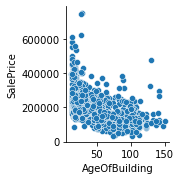

In [80]:
# Visualising the pairplot between AgeOfBuilding and 'SalePrice'
pp = sns.pairplot(data=data,
                  x_vars=['AgeOfBuilding'],
                  y_vars=['SalePrice'])

In [81]:
data.isnull().sum()

MSZoning         0
LotFrontage      0
LotArea          0
LotShape         0
LotConfig        0
Neighborhood     0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
Exterior1st      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
Foundation       0
BsmtQual         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
HeatingQC        0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenQual      0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
Fence            0
SaleType         0
SaleCondition    0
SalePrice        0
AgeOfBuilding    0
dtype: int64

In [82]:
data_numericals = data.select_dtypes('int64','float')

data_numericals.head()

LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  BsmtFinSF2  \
0     8450            7            5       2003          2003           0   
1     9600            6            8       1976          1976           0   
2    11250            7            5       2001          2002           0   
3     9550            7            5       1915          1970           0   
4    14260            8            5       2000          2000           0   

   BsmtUnfSF  TotalBsmtSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  \
0        150          856       854       1710             1         2   
1        284         1262         0       1262             0         2   
2        434          920       866       1786             1         2   
3        540          756       756       1717             1         1   
4        490         1145      1053       2198             1         2   

   HalfBath  BedroomAbvGr  Fireplaces  GarageCars  WoodDeckSF  OpenPorchSF  \
0         1             3           0           2           0           61   
1         0             3           1           2         298            0   
2         1             3           1           2           0           42   
3         0             3           1           3           0           35   
4         1             4           1           3         192           84   

   EnclosedPorch  SalePrice  AgeOfBuilding  
0              0     208500             19  
1              0     181500             46  
2              0     223500             21  
3            272     140000            107  
4              0     250000             22

In [83]:
data_categoricals= data.select_dtypes('object')

In [84]:
data_categoricals.head()

MSZoning LotShape LotConfig Neighborhood BldgType HouseStyle RoofStyle  \
0       RL      Reg    Inside      CollgCr     1Fam     2Story     Gable   
1       RL      Reg       FR2      Veenker     1Fam     1Story     Gable   
2       RL      IR1    Inside      CollgCr     1Fam     2Story     Gable   
3       RL      IR1    Corner      Crawfor     1Fam     2Story     Gable   
4       RL      IR1       FR2      NoRidge     1Fam     2Story     Gable   

  Exterior1st MasVnrType ExterQual Foundation BsmtQual BsmtExposure  \
0     VinylSd    BrkFace        Gd      PConc       Gd           No   
1     MetalSd       None        TA     CBlock       Gd           Gd   
2     VinylSd    BrkFace        Gd      PConc       Gd           Mn   
3     Wd Sdng       None        TA     BrkTil       TA           No   
4     VinylSd    BrkFace        Gd      PConc       Gd           Av   

  BsmtFinType1 HeatingQC KitchenQual   FireplaceQu GarageType GarageFinish  \
0          GLQ        Ex          Gd  No Fireplace     Attchd          RFn   
1          ALQ        Ex          TA            TA     Attchd          RFn   
2          GLQ        Ex          Gd            TA     Attchd          RFn   
3          ALQ        Gd          Gd            Gd     Detchd          Unf   
4          GLQ        Ex          Gd            TA     Attchd          RFn   

      Fence SaleType SaleCondition  
0  No Fence       WD        Normal  
1  No Fence       WD        Normal  
2  No Fence       WD        Normal  
3  No Fence       WD       Abnorml  
4  No Fence       WD        Normal

### DUMMY VARIABLES

In [85]:
data_categorical_encoding = pd.get_dummies(data_categoricals, drop_first = True)

In [86]:
data_categorical_encoding.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
0            0            0            1            0             0   
1            0            0            1            0             0   
2            0            0            1            0             0   
3            0            0            1            0             0   
4            0            0            1            0             0   

   LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  \
0             0             1                  0              0   
1             0             1                  0              1   
2             0             0                  0              0   
3             0             0                  0              0   
4             0             0                  0              1   

   LotConfig_FR3  LotConfig_Inside  Neighborhood_Blueste  Neighborhood_BrDale  \
0              0                 1                     0                    0   
1              0                 0                     0                    0   
2              0                 1                     0                    0   
3              0                 0                     0                    0   
4              0                 0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     1   
1                     0                     0                     0   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     1                     0                     0   
4                     0                     0                     0   

   Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
0                   0                     0                    0   
1                   0                     0                    0   
2                   0                     0                    0   
3                   0                     0                    0   
4                   0                     0                    0   

   Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     1                     0                     0   

   Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_SawyerW  \
0                   0                    0                     0   
1                   0                    0                     0   
2                   0                    0                     0   
3                   0                    0                     0   
4                   0                    0                     0   

   Neighborhood_Somerst  Neighborhood_StoneBr  Neighborhood_Timber  \
0                     0                     0                    0   
1                     0   

In [87]:
final_dataset = pd.concat([data_numericals,data_categorical_encoding], axis = 1)

In [88]:
final_dataset.head()

LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  BsmtFinSF2  \
0     8450            7            5       2003          2003           0   
1     9600            6            8       1976          1976           0   
2    11250            7            5       2001          2002           0   
3     9550            7            5       1915          1970           0   
4    14260            8            5       2000          2000           0   

   BsmtUnfSF  TotalBsmtSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  \
0        150          856       854       1710             1         2   
1        284         1262         0       1262             0         2   
2        434          920       866       1786             1         2   
3        540          756       756       1717             1         1   
4        490         1145      1053       2198             1         2   

   HalfBath  BedroomAbvGr  Fireplaces  GarageCars  WoodDeckSF  OpenPorchSF  \
0         1             3           0           2           0           61   
1         0             3           1           2         298            0   
2         1             3           1           2           0           42   
3         0             3           1           3           0           35   
4         1             4           1           3         192           84   

   EnclosedPorch  SalePrice  AgeOfBuilding  MSZoning_FV  MSZoning_RH  \
0              0     208500             19            0            0   
1              0     181500             46            0            0   
2              0     223500             21            0            0   
3            272     140000            107            0            0   
4              0     250000             22            0            0   

   MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0            1            0             0             0             1   
1            1            0             0             0             1   
2            1            0             0             0             0   
3            1            0             0             0             0   
4            1            0             0             0             0   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              1              0                 0   
2                  0              0              0                 1   
3                  0              0              0                 0   
4                  0              1              0                 0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     1                     0   
1                     0                     0                     0   
2                     0                     1                     0   
3                     0                     0                     1   
4                     0                     0                     0   

   Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   
3                     0                     0                    0   
4                     0                     0                    0   

   Neighborhood_MeadowV  Neighborhood_Mitchel  Neigh

In [89]:
final_dataset.shape

(1460, 149)

In [90]:
final_dataset.describe()

LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd  \
count    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    10516.828082     6.099315     5.575342  1971.267808   1984.865753   
std      9981.264932     1.382997     1.112799    30.202904     20.645407   
min      1300.000000     1.000000     1.000000  1872.000000   1950.000000   
25%      7553.500000     5.000000     5.000000  1954.000000   1967.000000   
50%      9478.500000     6.000000     5.000000  1973.000000   1994.000000   
75%     11601.500000     7.000000     6.000000  2000.000000   2004.000000   
max    215245.000000    10.000000     9.000000  2010.000000   2010.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     2ndFlrSF    GrLivArea  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452   346.992466  1515.463699   
std     161.319273   441.866955   438.705324   436.528436   525.480383   
min       0.000000     0.000000     0.000000     0.000000   334.000000   
25%       0.000000   223.000000   795.750000     0.000000  1129.500000   
50%       0.000000   477.500000   991.500000     0.000000  1464.000000   
75%       0.000000   808.000000  1298.250000   728.000000  1776.750000   
max    1474.000000  2336.000000  6110.000000  2065.000000  5642.000000   

       BsmtFullBath     FullBath     HalfBath  BedroomAbvGr   Fireplaces  \
count   1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean       0.425342     1.565068     0.382877      2.866438     0.613014   
std        0.518911     0.550916     0.502885      0.815778     0.644666   
min        0.000000     0.000000     0.000000      0.000000     0.000000   
25%        0.000000     1.000000     0.000000      2.000000     0.000000   
50%        0.000000     2.000000     0.000000      3.000000     1.000000   
75%        1.000000     2.000000     1.000000      3.000000     1.000000   
max        3.000000     3.000000     2.000000      8.000000     3.000000   

        GarageCars   WoodDeckSF  OpenPorchSF  EnclosedPorch      SalePrice  \
count  1460.000000  1460.000000  1460.000000    1460.000000    1460.000000   
mean      1.767123    94.244521    46.660274      21.954110  180921.195890   
std       0.747315   125.338794    66.256028      61.119149   79442.502883   
min       0.000000     0.000000     0.000000       0.000000   34900.000000   
25%       1.000000     0.000000     0.000000       0.000000  129975.000000   
50%       2.000000     0.000000    25.000000       0.000000  163000.000000   
75%       2.000000   168.000000    68.000000       0.000000  214000.000000   
max       4.000000   857.000000   547.000000     552.000000  755000.000000   

       AgeOfBuilding  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
count    1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean       50.732192     0.044521     0.010959     0.788356     0.149315   
std        30.202904     0.206319     0.104145     0.408614     0.356521   
min        12.000000     0.000000     0.000000     0.000000     0.000000   
25%        22.000000     0.000000     0.000000     1.000000     0.000000   
50%        49.000000     0.000000     0.000000     1.000000     0.000000   
75%        68.000000     0.000000     0.000000     1.000000     0.000000   
max       150.000000     1.000000     1.000000     1.000000     1.000000   

       LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  \
count   1460.000000   1460.000000   1460.000000        1460.000000   
mean       0.028082      0.006849      0.633562           0.064384   
std        0.165264      0.082505      0.481996           0.245519   
min        0.000000      0.000000      0.000000           0.000000   
25%        0.000000      0.000000      0.000000           0.000000   
50%        0.000000      0.000000      1.000000           0.000000   
75%        0.000000      0.000000      1.000000           0.000000   
max        1.000000

### OutLier Removal

In [91]:
# Handling outliers for LotArea column
Q1 = final_dataset.LotArea.quantile(0.25)
Q3 = final_dataset.LotArea.quantile(0.75)
IQR = Q3-Q1

In [92]:

final_dataset = final_dataset[~((final_dataset.LotArea < (Q1 - 1.5 * IQR)) |(final_dataset.LotArea > (Q3 + 1.5 * IQR)))]
final_dataset
final_dataset.shape

(1391, 149)

In [93]:
final_dataset.describe()

LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd  \
count   1391.000000  1391.000000  1391.000000  1391.000000   1391.000000   
mean    9272.537024     6.091301     5.577283  1971.557872   1984.989216   
std     3196.732418     1.371709     1.105071    30.301757     20.676905   
min     1491.000000     1.000000     1.000000  1872.000000   1950.000000   
25%     7429.000000     5.000000     5.000000  1954.000000   1967.000000   
50%     9286.000000     6.000000     5.000000  1974.000000   1994.000000   
75%    11231.500000     7.000000     6.000000  2001.000000   2004.000000   
max    17671.000000    10.000000     9.000000  2010.000000   2010.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     2ndFlrSF    GrLivArea  \
count  1391.000000  1391.000000  1391.000000  1391.000000  1391.000000   
mean     43.389648   568.539899  1041.950395   338.979152  1489.260244   
std     153.444567   442.508797   410.119186   426.406275   485.856071   
min       0.000000     0.000000     0.000000     0.000000   334.000000   
25%       0.000000   226.000000   793.000000     0.000000  1122.500000   
50%       0.000000   480.000000   980.000000     0.000000  1442.000000   
75%       0.000000   802.000000  1268.000000   726.000000  1751.000000   
max    1474.000000  2336.000000  3206.000000  2065.000000  4476.000000   

       BsmtFullBath     FullBath     HalfBath  BedroomAbvGr   Fireplaces  \
count   1391.000000  1391.000000  1391.000000   1391.000000  1391.000000   
mean       0.413372     1.557153     0.378864      2.859094     0.585191   
std        0.508426     0.541252     0.501321      0.805727     0.628836   
min        0.000000     0.000000     0.000000      0.000000     0.000000   
25%        0.000000     1.000000     0.000000      2.000000     0.000000   
50%        0.000000     2.000000     0.000000      3.000000     1.000000   
75%        1.000000     2.000000     1.000000      3.000000     1.000000   
max        3.000000     3.000000     2.000000      8.000000     3.000000   

       GarageCars   WoodDeckSF  OpenPorchSF  EnclosedPorch      SalePrice  \
count  1391.00000  1391.000000  1391.000000    1391.000000    1391.000000   
mean      1.74982    90.616104    45.171819      21.656362  178136.292595   
std       0.74955   119.725354    63.498462      59.418996   75793.167741   
min       0.00000     0.000000     0.000000       0.000000   34900.000000   
25%       1.00000     0.000000     0.000000       0.000000  129000.000000   
50%       2.00000     0.000000    24.000000       0.000000  160000.000000   
75%       2.00000   168.000000    66.000000       0.000000  210000.000000   
max       4.00000   736.000000   547.000000     386.000000  745000.000000   

       AgeOfBuilding  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
count    1391.000000  1391.000000  1391.000000  1391.000000  1391.000000   
mean       50.442128     0.046729     0.011503     0.781452     0.153846   
std        30.301757     0.211134     0.106670     0.413410     0.360931   
min        12.000000     0.000000     0.000000     0.000000     0.000000   
25%        21.000000     0.000000     0.000000     1.000000     0.000000   
50%        48.000000     0.000000     0.000000     1.000000     0.000000   
75%        68.000000     0.000000     0.000000     1.000000     0.000000   
max       150.000000     1.000000     1.000000     1.000000     1.000000   

       LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  \
count   1391.000000   1391.000000   1391.000000        1391.000000   
mean       0.019410      0.003595      0.647735           0.054637   
std        0.138012      0.059868      0.477848           0.227352   
min        0.000000      0.000000      0.000000           0.000000   
25%        0.000000      0.000000      0.000000           0.000000   
50%        0.000000      0.000000      1.000000           0.000000   
75%        0.000000      0.000000      1.000000           0.000000   
max        1.000000      1.000000   

In [94]:
final_dataset.shape

(1391, 149)

In [95]:
# Handling outliers for SalePrice column
Q1 = final_dataset.SalePrice.quantile(0.25)
Q3 = final_dataset.SalePrice.quantile(0.75)
IQR = Q3-Q1

In [96]:
final_dataset = final_dataset[~((final_dataset.SalePrice < (Q1 - 1.5 * IQR)) |(final_dataset.SalePrice > (Q3 + 1.5 * IQR)))]
final_dataset
final_dataset.shape

(1330, 149)

In [97]:
final_dataset.describe()

LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd  \
count   1330.000000  1330.000000  1330.000000  1330.000000   1330.000000   
mean    9114.127820     5.972180     5.596992  1970.214286   1984.093985   
std     3140.309472     1.270126     1.112886    30.152009     20.684510   
min     1491.000000     1.000000     1.000000  1872.000000   1950.000000   
25%     7273.250000     5.000000     5.000000  1952.250000   1966.000000   
50%     9138.500000     6.000000     5.000000  1972.000000   1992.000000   
75%    10999.500000     7.000000     6.000000  2000.000000   2003.000000   
max    17671.000000    10.000000     9.000000  2009.000000   2010.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     2ndFlrSF    GrLivArea  \
count  1330.000000  1330.000000  1330.000000  1330.000000  1330.000000   
mean     44.974436   559.284962  1009.514286   328.075188  1449.094737   
std     156.056431   428.666913   376.710298   412.906274   444.477128   
min       0.000000     0.000000     0.000000     0.000000   334.000000   
25%       0.000000   221.500000   780.750000     0.000000  1111.250000   
50%       0.000000   475.000000   960.500000     0.000000  1417.500000   
75%       0.000000   798.750000  1232.000000   712.750000  1716.000000   
max    1474.000000  2042.000000  3206.000000  1611.000000  3395.000000   

       BsmtFullBath     FullBath     HalfBath  BedroomAbvGr   Fireplaces  \
count   1330.000000  1330.000000  1330.000000   1330.000000  1330.000000   
mean       0.398496     1.530075     0.366917      2.852632     0.554887   
std        0.506390     0.529986     0.499017      0.802140     0.616120   
min        0.000000     0.000000     0.000000      0.000000     0.000000   
25%        0.000000     1.000000     0.000000      2.000000     0.000000   
50%        0.000000     2.000000     0.000000      3.000000     0.000000   
75%        1.000000     2.000000     1.000000      3.000000     1.000000   
max        3.000000     3.000000     2.000000      8.000000     3.000000   

        GarageCars   WoodDeckSF  OpenPorchSF  EnclosedPorch      SalePrice  \
count  1330.000000  1330.000000  1330.000000    1330.000000    1330.000000   
mean      1.697744    86.728571    43.153383      21.966917  167809.108271   
std       0.721847   117.718987    62.878558      59.584683   57520.677362   
min       0.000000     0.000000     0.000000       0.000000   34900.000000   
25%       1.000000     0.000000     0.000000       0.000000  128000.000000   
50%       2.000000     0.000000    21.000000       0.000000  157000.000000   
75%       2.000000   160.000000    63.000000       0.000000  200000.000000   
max       4.000000   736.000000   547.000000     386.000000  328900.000000   

       AgeOfBuilding  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
count    1330.000000  1330.000000  1330.000000  1330.000000  1330.000000   
mean       51.785714     0.046617     0.012030     0.774436     0.160150   
std        30.152009     0.210895     0.109061     0.418110     0.366883   
min        13.000000     0.000000     0.000000     0.000000     0.000000   
25%        22.000000     0.000000     0.000000     1.000000     0.000000   
50%        50.000000     0.000000     0.000000     1.000000     0.000000   
75%        69.750000     0.000000     0.000000     1.000000     0.000000   
max       150.000000     1.000000     1.000000     1.000000     1.000000   

       LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  \
count   1330.000000   1330.000000   1330.000000        1330.000000   
mean       0.019549      0.003759      0.654135           0.054135   
std        0.138496      0.061222      0.475828           0.226370   
min        0.000000      0.000000      0.000000           0.000000   
25%        0.000000      0.000000      0.000000           0.000000   
50%        0.000000      0.000000      1.000000           0.000000   
75%        0.000000      0.000000      1.000000           0.000000   
max        1.000000      1.

### Splitting into train and test set

In [98]:
df_train, df_test = train_test_split(final_dataset, train_size = 0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(930, 149)
(400, 149)


In [99]:
df_train.head()

LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  BsmtFinSF2  \
1093     9230            5            8       1965          1998           0   
60      13072            6            5       2004          2004           0   
740      9600            5            7       1910          2002           0   
369      9830            5            7       1959          2006         258   
466     10628            7            5       1970          1970           0   

      BsmtUnfSF  TotalBsmtSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  \
1093        203          864         0       1200             1         1   
60          217         1158         0       1158             1         1   
740         264          264       664       1432             0         2   
369         733         1063         0       1287             1         1   
466         499         1277         0       1277             1         1   

      HalfBath  BedroomAbvGr  Fireplaces  GarageCars  WoodDeckSF  OpenPorchSF  \
1093         1             1           0           2           0           64   
60           1             3           0           2           0           50   
740          0             2           0           2         270            0   
369          0             3           1           2         364           17   
466          0             2           1           2           0            0   

      EnclosedPorch  SalePrice  AgeOfBuilding  MSZoning_FV  MSZoning_RH  \
1093              0     146000             57            0            0   
60                0     158000             18            0            0   
740             112     132000            112            0            0   
369               0     162000             63            0            0   
466               0     167000             52            0            0   

      MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
1093            1            0             0             0             1   
60              1            0             0             0             1   
740             0            1             0             0             1   
369             1            0             0             0             0   
466             1            0             0             0             1   

      LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
1093                  0              0              0                 0   
60                    0              0              0                 1   
740                   0              0              0                 1   
369                   0              0              0                 0   
466                   0              0              0                 1   

      Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
1093                     0                    0                     0   
60                       0                    0                     0   
740                      0                    0                     0   
369                      0                    0                     0   
466                      0                    0                     0   

      Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
1093                     0                     0                     0   
60                       0                     0                     0   
740                      0                     0                     0   
369                      0                     0                     0   
466                      0                     0                     0   

      Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
1093                     0                     0                    0   
60                       0                     0                    0   
740                      0                     0                    0   
369                      0              

In [100]:

df_train.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=149)

In [101]:
# converting df_train to int datatype
df_train = df_train.astype(int)

In [102]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 930 entries, 1093 to 871
Columns: 149 entries, LotArea to SaleCondition_Partial
dtypes: int32(149)
memory usage: 548.6 KB


In [103]:
df_train.head()

LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  BsmtFinSF2  \
1093     9230            5            8       1965          1998           0   
60      13072            6            5       2004          2004           0   
740      9600            5            7       1910          2002           0   
369      9830            5            7       1959          2006         258   
466     10628            7            5       1970          1970           0   

      BsmtUnfSF  TotalBsmtSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  \
1093        203          864         0       1200             1         1   
60          217         1158         0       1158             1         1   
740         264          264       664       1432             0         2   
369         733         1063         0       1287             1         1   
466         499         1277         0       1277             1         1   

      HalfBath  BedroomAbvGr  Fireplaces  GarageCars  WoodDeckSF  OpenPorchSF  \
1093         1             1           0           2           0           64   
60           1             3           0           2           0           50   
740          0             2           0           2         270            0   
369          0             3           1           2         364           17   
466          0             2           1           2           0            0   

      EnclosedPorch  SalePrice  AgeOfBuilding  MSZoning_FV  MSZoning_RH  \
1093              0     146000             57            0            0   
60                0     158000             18            0            0   
740             112     132000            112            0            0   
369               0     162000             63            0            0   
466               0     167000             52            0            0   

      MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
1093            1            0             0             0             1   
60              1            0             0             0             1   
740             0            1             0             0             1   
369             1            0             0             0             0   
466             1            0             0             0             1   

      LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
1093                  0              0              0                 0   
60                    0              0              0                 1   
740                   0              0              0                 1   
369                   0              0              0                 0   
466                   0              0              0                 1   

      Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
1093                     0                    0                     0   
60                       0                    0                     0   
740                      0                    0                     0   
369                      0                    0                     0   
466                      0                    0                     0   

      Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
1093                     0                     0                     0   
60                       0                     0                     0   
740                      0                     0                     0   
369                      0                     0                     0   
466                      0                     0                     0   

      Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
1093                     0                     0                    0   
60                       0                     0                    0   
740                      0                     0                    0   
369                      0              

In [104]:
df_train.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=149)

In [105]:
# MinMax Scaling

# Instatiate the object
scaler = MinMaxScaler()

num_vars = ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
        'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea','BsmtFullBath','FullBath','HalfBath',
             'BedroomAbvGr','Fireplaces','GarageCars','WoodDeckSF','OpenPorchSF','EnclosedPorch',
                 'SalePrice','AgeOfBuilding']

# Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  BsmtFinSF2  \
1093  0.480415        0.500     0.857143   0.671642      0.800000           0   
60    0.718915        0.625     0.428571   0.962687      0.900000           0   
740   0.503383        0.500     0.714286   0.261194      0.866667           0   
369   0.517661        0.500     0.714286   0.626866      0.933333         258   
466   0.567198        0.750     0.428571   0.708955      0.333333           0   

      BsmtUnfSF  TotalBsmtSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  \
1093   0.099412     0.342314  0.000000   0.299861           0.5  0.333333   
60     0.106268     0.458796  0.000000   0.285319           0.5  0.333333   
740    0.129285     0.104596  0.412166   0.380194           0.0  0.666667   
369    0.358962     0.421157  0.000000   0.329986           0.5  0.333333   
466    0.244368     0.505943  0.000000   0.326524           0.5  0.333333   

      HalfBath  BedroomAbvGr  Fireplaces  GarageCars  WoodDeckSF  OpenPorchSF  \
1093       0.5      0.166667    0.000000         0.5    0.000000     0.117002   
60         0.5      0.500000    0.000000         0.5    0.000000     0.091408   
740        0.0      0.333333    0.000000         0.5    0.468750     0.000000   
369        0.0      0.500000    0.333333         0.5    0.631944     0.031079   
466        0.0      0.333333    0.333333         0.5    0.000000     0.000000   

      EnclosedPorch  SalePrice  AgeOfBuilding  MSZoning_FV  MSZoning_RH  \
1093       0.000000   0.377891       0.328358            0            0   
60         0.000000   0.418707       0.037313            0            0   
740        0.290155   0.330272       0.738806            0            0   
369        0.000000   0.432313       0.373134            0            0   
466        0.000000   0.449320       0.291045            0            0   

      MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
1093            1            0             0             0             1   
60              1            0             0             0             1   
740             0            1             0             0             1   
369             1            0             0             0             0   
466             1            0             0             0             1   

      LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
1093                  0              0              0                 0   
60                    0              0              0                 1   
740                   0              0              0                 1   
369                   0              0              0                 0   
466                   0              0              0                 1   

      Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
1093                     0                    0                     0   
60                       0                    0                     0   
740                      0                    0                     0   
369                      0                    0                     0   
466                      0                    0                     0   

      Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
1093                     0                     0                     0   
60                       0                     0                     0   
740                      0                     0                     0   
369                      0                     0                     0   
466                      0                     0                     0   

      Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
1093                     0                     0                    0   
60                       0                     0                    0   
740                      0                     0                    0   
369                      0         

In [106]:
df_train.describe()

LotArea  OverallQual  OverallCond   YearBuilt  YearRemodAdd  \
count  930.000000   930.000000   930.000000  930.000000    930.000000   
mean     0.472825     0.616129     0.510292    0.707479      0.564427   
std      0.198411     0.159539     0.157114    0.227133      0.345823   
min      0.000000     0.000000     0.000000    0.000000      0.000000   
25%      0.355128     0.500000     0.428571    0.561567      0.250000   
50%      0.472965     0.625000     0.428571    0.723881      0.700000   
75%      0.588025     0.750000     0.571429    0.925373      0.883333   
max      1.000000     1.000000     1.000000    1.000000      1.000000   

        BsmtFinSF2   BsmtUnfSF  TotalBsmtSF    2ndFlrSF   GrLivArea  \
count   930.000000  930.000000   930.000000  930.000000  930.000000   
mean     39.697849    0.273405     0.399729    0.199610    0.385941   
std     148.657625    0.209090     0.149972    0.253933    0.152852   
min       0.000000    0.000000     0.000000    0.000000    0.000000   
25%       0.000000    0.109207     0.310222    0.000000    0.269737   
50%       0.000000    0.237023     0.384311    0.000000    0.374654   
75%       0.000000    0.390671     0.491284    0.436220    0.476108   
max    1474.000000    1.000000     1.000000    1.000000    1.000000   

       BsmtFullBath    FullBath    HalfBath  BedroomAbvGr  Fireplaces  \
count    930.000000  930.000000  930.000000    930.000000  930.000000   
mean       0.202151    0.510036    0.176344      0.473297    0.188172   
std        0.254128    0.176904    0.245694      0.132948    0.206528   
min        0.000000    0.000000    0.000000      0.000000    0.000000   
25%        0.000000    0.333333    0.000000      0.333333    0.000000   
50%        0.000000    0.666667    0.000000      0.500000    0.000000   
75%        0.500000    0.666667    0.500000      0.500000    0.333333   
max        1.000000    1.000000    1.000000      1.000000    1.000000   

       GarageCars  WoodDeckSF  OpenPorchSF  EnclosedPorch   SalePrice  \
count  930.000000  930.000000   930.000000     930.000000  930.000000   
mean     0.423925    0.146987     0.080232       0.061307    0.450067   
std      0.181357    0.197381     0.118264       0.160802    0.195659   
min      0.000000    0.000000     0.000000       0.000000    0.000000   
25%      0.250000    0.000000     0.000000       0.000000    0.316667   
50%      0.500000    0.000000     0.037477       0.000000    0.417007   
75%      0.500000    0.267361     0.117002       0.000000    0.561565   
max      1.000000    1.000000     1.000000       1.000000    1.000000   

       AgeOfBuilding  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
count     930.000000   930.000000   930.000000   930.000000   930.000000   
mean        0.292521     0.048387     0.013978     0.760215     0.169892   
std         0.227133     0.214698     0.117465     0.427182     0.375740   
min         0.000000     0.000000     0.000000     0.000000     0.000000   
25%         0.074627     0.000000     0.000000     1.000000     0.000000   
50%         0.276119     0.000000     0.000000     1.000000     0.000000   
75%         0.438433     0.000000     0.000000     1.000000     0.000000   
max         1.000000     1.000000     1.000000     1.000000     1.000000   

       LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  \
count    930.000000    930.000000    930.000000         930.000000   
mean       0.015054      0.003226      0.654839           0.054839   
std        0.121832      0.056735      0.475677           0.227788   
min        0.000000      0.000000      0.000000           0.000000   
25%        0.000000      0.000000      0.000000           0.000000   
50%        0.000000      0.000000      1.000000           0.000000   
75%        0.000000      0.000000      1.000000           0.000000   
max        1.000000      1.000000      1.000000           1.000000   

       LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  Neighborhood_Blueste  \
c

### Train the model

In [107]:
# assigning cnt to y as it is the target variable
y_train = df_train.pop('SalePrice')

In [108]:
y_train.head()

1093    0.377891
60      0.418707
740     0.330272
369     0.432313
466     0.449320
Name: SalePrice, dtype: float64

In [109]:
y_train.shape

(930,)

In [110]:
# assigning varibles to X =, while dropping unnecessary variables
X_train = df_train

In [111]:
X_train.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=148)

In [112]:
X_train.head()

LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  BsmtFinSF2  \
1093  0.480415        0.500     0.857143   0.671642      0.800000           0   
60    0.718915        0.625     0.428571   0.962687      0.900000           0   
740   0.503383        0.500     0.714286   0.261194      0.866667           0   
369   0.517661        0.500     0.714286   0.626866      0.933333         258   
466   0.567198        0.750     0.428571   0.708955      0.333333           0   

      BsmtUnfSF  TotalBsmtSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  \
1093   0.099412     0.342314  0.000000   0.299861           0.5  0.333333   
60     0.106268     0.458796  0.000000   0.285319           0.5  0.333333   
740    0.129285     0.104596  0.412166   0.380194           0.0  0.666667   
369    0.358962     0.421157  0.000000   0.329986           0.5  0.333333   
466    0.244368     0.505943  0.000000   0.326524           0.5  0.333333   

      HalfBath  BedroomAbvGr  Fireplaces  GarageCars  WoodDeckSF  OpenPorchSF  \
1093       0.5      0.166667    0.000000         0.5    0.000000     0.117002   
60         0.5      0.500000    0.000000         0.5    0.000000     0.091408   
740        0.0      0.333333    0.000000         0.5    0.468750     0.000000   
369        0.0      0.500000    0.333333         0.5    0.631944     0.031079   
466        0.0      0.333333    0.333333         0.5    0.000000     0.000000   

      EnclosedPorch  AgeOfBuilding  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
1093       0.000000       0.328358            0            0            1   
60         0.000000       0.037313            0            0            1   
740        0.290155       0.738806            0            0            0   
369        0.000000       0.373134            0            0            1   
466        0.000000       0.291045            0            0            1   

      MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
1093            0             0             0             1   
60              0             0             0             1   
740             1             0             0             1   
369             0             0             0             0   
466             0             0             0             1   

      LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
1093                  0              0              0                 0   
60                    0              0              0                 1   
740                   0              0              0                 1   
369                   0              0              0                 0   
466                   0              0              0                 1   

      Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
1093                     0                    0                     0   
60                       0                    0                     0   
740                      0                    0                     0   
369                      0                    0                     0   
466                      0                    0                     0   

      Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
1093                     0                     0                     0   
60                       0                     0                     0   
740                      0                     0                     0   
369                      0                     0                     0   
466                      0                     0                     0   

      Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
1093                     0                     0                    0   
60                       0                     0                    0   
740                      0                     0                    0   
369                      0                     0                    0   
466                      0  

In [113]:
X_train.shape

(930, 148)

### 1. LINEAR REGRESSION

In [114]:
from sklearn.model_selection import cross_val_score
lin_regressor = LinearRegression()
mse = cross_val_score(lin_regressor,X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)
lin_regressor.fit(X_train,y_train)
mean_mse = np.mean(mse)
print(mean_mse)

-0.0033386933475560315


In [115]:
lin_y_pred = lin_regressor.predict(X_train)

In [116]:
r2_score(y_train , lin_y_pred)

0.9428509373306565

### 2. RIDGE REGRESSION

In [117]:
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
parameters = {'alpha' : [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                        2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge_regressor = GridSearchCV(ridge, parameters,scoring = 'neg_mean_squared_error', cv = 5)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             scoring='neg_mean_squared_error')

In [118]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1.0}
-0.0031525921541171015


In [119]:
ridge_regressor.best_estimator_.coef_

array([ 6.25915484e-02,  1.96984989e-01,  1.21579326e-01,  6.38576562e-02,
        2.71990147e-02, -5.82199043e-06, -5.19960801e-02,  2.39354429e-01,
        7.65800825e-02,  2.83185654e-01,  2.79403806e-02,  2.90141610e-02,
        1.27222253e-02, -5.18866033e-03,  3.67302045e-02,  1.19628028e-01,
        3.14681809e-02,  2.91835107e-02,  6.10142862e-03, -6.38576562e-02,
        4.37536639e-02,  5.99412123e-02,  5.80431689e-02,  3.10418650e-02,
        1.71851211e-02,  2.30172986e-02, -1.17063215e-03,  1.11711614e-02,
       -2.39253993e-02, -3.22071747e-02, -4.58005128e-04,  1.66166583e-03,
        2.84968966e-02,  2.48140247e-02, -2.98781324e-02, -1.23043546e-02,
        6.20115435e-02, -3.45167392e-02, -3.25271187e-02,  1.19807480e-02,
       -1.20056506e-02, -3.80217011e-02, -2.52743416e-02,  2.42727346e-02,
       -1.83007906e-02,  6.84956642e-02,  4.71878367e-02, -1.76887571e-02,
       -1.22209156e-02, -2.91814694e-02, -3.82355640e-03,  5.73262585e-02,
        8.06181081e-02,  

In [120]:
ridge_y_pred = ridge_regressor.predict(X_train)

In [121]:
r2_score(y_train , ridge_y_pred) 

0.9412232647810852

### LASSO

In [122]:
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha' : [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                        2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}
lasso_regressor = GridSearchCV(lasso, parameters,scoring = 'neg_mean_squared_error', cv = 5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             scoring='neg_mean_squared_error')

In [123]:
coeff_names = X_train.columns
coeff_names

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=148)

In [124]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.0001}
-0.003143455654713788


In [125]:
lasso_regressor.best_estimator_.coef_

array([ 5.90025616e-02,  2.23435317e-01,  1.30125550e-01,  1.25868081e-01,
        2.52689300e-02, -1.12251340e-05, -7.21751081e-02,  2.70148643e-01,
        4.76753152e-02,  3.43521023e-01,  2.12870600e-02,  3.17309447e-03,
        5.42090041e-03, -8.10508925e-03,  2.68924913e-02,  1.15144452e-01,
        2.74484171e-02,  1.83184369e-02,  0.00000000e+00, -7.27043523e-03,
        6.09171452e-03,  2.52121706e-02,  2.60244838e-02,  0.00000000e+00,
        9.93119123e-03,  0.00000000e+00, -1.64964046e-03,  8.98385827e-03,
       -1.46290828e-02, -1.53862645e-02,  0.00000000e+00,  0.00000000e+00,
        2.17083406e-02,  2.93014297e-02, -1.15089236e-02, -3.12415341e-03,
        6.71701821e-02, -2.31183941e-02, -1.72570557e-02,  1.08912548e-02,
       -0.00000000e+00, -2.69122538e-02, -1.71434561e-02,  1.57215632e-02,
       -7.94311813e-03,  6.87754943e-02,  4.96642385e-02, -1.03684289e-02,
       -0.00000000e+00, -1.95825712e-02,  0.00000000e+00,  6.91402171e-02,
        7.15795420e-02,  

In [126]:
lasso_y_pred = lasso_regressor.predict(X_train)

In [127]:
r2_score(y_train , lasso_y_pred)

0.939434375093632

In [128]:
# Metrics to give an overall sense of error in the linear model
rss = np.sum(np.square(y_train - lin_y_pred))
print(rss)
mse = mean_squared_error(y_train, lin_y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

2.032468631617752
0.0021854501415244647
0.04674879828962949


In [129]:
# Metrics to give an overall sense of error in the ridge model
rss = np.sum(np.square(y_train - ridge_y_pred))
print(rss)
mse = mean_squared_error(y_train, ridge_y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

2.0903557297612454
0.002247694333076608
0.047409854809697616


In [130]:
# Metrics to give an overall sense of error in the lasso model
rss = np.sum(np.square(y_train - lasso_y_pred))
print(rss)
mse = mean_squared_error(y_train, lasso_y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

2.1539764088301157
0.0023161036654087263
0.04812591469685253


### VALIDATING TEST SET

In [131]:
df_test.shape

(400, 149)

In [132]:
df_test.head()

LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  BsmtFinSF2  \
615      8800            6            7       1963          1963           0   
1083     8800            6            6       1964          1964           0   
238     12030            8            5       2007          2007           0   
343      8849            9            5       2005          2005           0   
804      9000            5            5       1954          1954           0   

      BsmtUnfSF  TotalBsmtSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  \
615         173          936         0       1054             1         1   
1083        698         1251         0       1251             1         1   
238        1694         1694         0       1694             0         2   
343        1656         1684         0       1684             0         2   
804         124          936         0       1128             0         1   

      HalfBath  BedroomAbvGr  Fireplaces  GarageCars  WoodDeckSF  OpenPorchSF  \
615          0             3           0           2         120            0   
1083         0             3           2           1           0          116   
238          0             3           0           3         168          228   
343          0             2           1           2         495           72   
804          0             2           0           1           0            0   

      EnclosedPorch  SalePrice  AgeOfBuilding  MSZoning_FV  MSZoning_RH  \
615               0     137500             59            0            0   
1083              0     160000             58            0            0   
238               0     318000             15            0            0   
343               0     266000             17            0            0   
804               0     118000             68            0            0   

      MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
615             1            0             0             0             1   
1083            1            0             0             0             1   
238             1            0             0             0             1   
343             1            0             0             0             0   
804             1            0             0             0             1   

      LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
615                   0              0              0                 1   
1083                  0              0              0                 1   
238                   0              0              0                 1   
343                   0              0              0                 1   
804                   0              0              0                 1   

      Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
615                      0                    0                     0   
1083                     0                    0                     0   
238                      0                    0                     0   
343                      0                    0                     0   
804                      0                    0                     0   

      Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
615                      0                     0                     0   
1083                     0                     0                     0   
238                      0                     0                     0   
343                      0                     0                     0   
804                      0                     0                     0   

      Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
615                      0                     0                    0   
1083                     0                     0                    0   
238                      0                     0                    0   
343                      0              

In [133]:
# converting df_train to int datatype
df_test = df_test.astype(int)

In [134]:
# MinMax Scaling

# Instatiate the object
scaler = MinMaxScaler()

num_vars_test = ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
        'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea','BsmtFullBath','FullBath','HalfBath',
             'BedroomAbvGr','Fireplaces','GarageCars','WoodDeckSF','OpenPorchSF','EnclosedPorch',
                 'SalePrice','AgeOfBuilding']

# Fit on data
df_test[num_vars_test] = scaler.fit_transform(df_test[num_vars_test])

df_test.head()

LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  BsmtFinSF2  \
615   0.445250     0.555556        0.750   0.664234      0.220339           0   
1083  0.445250     0.555556        0.625   0.671533      0.237288           0   
238   0.647239     0.777778        0.500   0.985401      0.966102           0   
343   0.448315     0.888889        0.500   0.970803      0.932203           0   
804   0.457757     0.444444        0.500   0.598540      0.067797           0   

      BsmtUnfSF  TotalBsmtSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  \
615    0.090814     0.291953       0.0   0.185739      0.333333  0.333333   
1083   0.366404     0.390206       0.0   0.254261      0.333333  0.333333   
238    0.889239     0.528384       0.0   0.408348      0.000000  0.666667   
343    0.869291     0.525265       0.0   0.404870      0.000000  0.666667   
804    0.065092     0.291953       0.0   0.211478      0.000000  0.333333   

      HalfBath  BedroomAbvGr  Fireplaces  GarageCars  WoodDeckSF  OpenPorchSF  \
615        0.0         0.375    0.000000        0.50    0.163043     0.000000   
1083       0.0         0.375    0.666667        0.25    0.000000     0.231076   
238        0.0         0.375    0.000000        0.75    0.228261     0.454183   
343        0.0         0.250    0.333333        0.50    0.672554     0.143426   
804        0.0         0.250    0.000000        0.25    0.000000     0.000000   

      EnclosedPorch  SalePrice  AgeOfBuilding  MSZoning_FV  MSZoning_RH  \
615             0.0   0.338542       0.335766            0            0   
1083            0.0   0.416667       0.328467            0            0   
238             0.0   0.965278       0.014599            0            0   
343             0.0   0.784722       0.029197            0            0   
804             0.0   0.270833       0.401460            0            0   

      MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
615             1            0             0             0             1   
1083            1            0             0             0             1   
238             1            0             0             0             1   
343             1            0             0             0             0   
804             1            0             0             0             1   

      LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
615                   0              0              0                 1   
1083                  0              0              0                 1   
238                   0              0              0                 1   
343                   0              0              0                 1   
804                   0              0              0                 1   

      Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
615                      0                    0                     0   
1083                     0                    0                     0   
238                      0                    0                     0   
343                      0                    0                     0   
804                      0                    0                     0   

      Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
615                      0                     0                     0   
1083                     0                     0                     0   
238                      0                     0                     0   
343                      0                     0                     0   
804                      0                     0                     0   

      Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
615                      0                     0                    0   
1083                     0                     0                    0   
238                      0                     0                    0   
343                      0         

In [135]:
df_test.describe()

LotArea  OverallQual  OverallCond   YearBuilt  YearRemodAdd  \
count  400.000000   400.000000   400.000000  400.000000    400.000000   
mean     0.465823     0.563611     0.581875    0.723887      0.586864   
std      0.188244     0.139051     0.142754    0.215307      0.348288   
min      0.000000     0.000000     0.000000    0.000000      0.000000   
25%      0.361313     0.444444     0.500000    0.598540      0.283898   
50%      0.475236     0.555556     0.500000    0.737226      0.728814   
75%      0.582875     0.666667     0.625000    0.934307      0.915254   
max      1.000000     1.000000     1.000000    1.000000      1.000000   

        BsmtFinSF2   BsmtUnfSF  TotalBsmtSF    2ndFlrSF   GrLivArea  \
count   400.000000  400.000000   400.000000  400.000000  400.000000   
mean     57.242500    0.294799     0.315317    0.238332    0.323565   
std     171.604528    0.227368     0.116317    0.292907    0.157226   
min       0.000000    0.000000     0.000000    0.000000    0.000000   
25%       0.000000    0.115354     0.243294    0.000000    0.201913   
50%       0.000000    0.241207     0.297411    0.000000    0.313217   
75%       0.000000    0.427428     0.374454    0.505729    0.421652   
max    1127.000000    1.000000     1.000000    1.000000    1.000000   

       BsmtFullBath    FullBath    HalfBath  BedroomAbvGr  Fireplaces  \
count    400.000000  400.000000  400.000000    400.000000  400.000000   
mean       0.128333    0.510000    0.200000      0.360312    0.177500   
std        0.167467    0.176320    0.257713      0.101577    0.202723   
min        0.000000    0.000000    0.000000      0.000000    0.000000   
25%        0.000000    0.333333    0.000000      0.250000    0.000000   
50%        0.000000    0.666667    0.000000      0.375000    0.000000   
75%        0.333333    0.666667    0.500000      0.375000    0.333333   
max        1.000000    1.000000    1.000000      1.000000    1.000000   

       GarageCars  WoodDeckSF  OpenPorchSF  EnclosedPorch   SalePrice  \
count  400.000000  400.000000   400.000000     400.000000  400.000000   
mean     0.425625    0.124358     0.082565       0.064357    0.448539   
std      0.178583    0.172022     0.116517       0.190095    0.199869   
min      0.000000    0.000000     0.000000       0.000000    0.000000   
25%      0.250000    0.000000     0.000000       0.000000    0.308333   
50%      0.500000    0.000000     0.045817       0.000000    0.405264   
75%      0.500000    0.228261     0.123506       0.000000    0.555556   
max      1.000000    1.000000     1.000000       1.000000    1.000000   

       AgeOfBuilding  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
count     400.000000    400.00000   400.000000   400.000000   400.000000   
mean        0.276113      0.04250     0.007500     0.807500     0.137500   
std         0.215307      0.20198     0.086385     0.394757     0.344806   
min         0.000000      0.00000     0.000000     0.000000     0.000000   
25%         0.065693      0.00000     0.000000     1.000000     0.000000   
50%         0.262774      0.00000     0.000000     1.000000     0.000000   
75%         0.401460      0.00000     0.000000     1.000000     0.000000   
max         1.000000      1.00000     1.000000     1.000000     1.000000   

       LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  \
count    400.000000    400.000000    400.000000         400.000000   
mean       0.030000      0.005000      0.652500           0.052500   
std        0.170801      0.070622      0.476773           0.223312   
min        0.000000      0.000000      0.000000           0.000000   
25%        0.000000      0.000000      0.000000           0.000000   
50%        0.000000      0.000000      1.000000           0.000000   
75%        0.000000      0.000000      1.000000           0.000000   
max        1.000000      1.000000      1.000000           1.000000   

       LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  Neighborhood_Blueste  \
c

In [136]:
y_test = df_test.pop('SalePrice')

In [137]:
y_test.shape

(400,)

In [138]:
X_test = df_test

In [139]:
X_test.head()

LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  BsmtFinSF2  \
615   0.445250     0.555556        0.750   0.664234      0.220339           0   
1083  0.445250     0.555556        0.625   0.671533      0.237288           0   
238   0.647239     0.777778        0.500   0.985401      0.966102           0   
343   0.448315     0.888889        0.500   0.970803      0.932203           0   
804   0.457757     0.444444        0.500   0.598540      0.067797           0   

      BsmtUnfSF  TotalBsmtSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  \
615    0.090814     0.291953       0.0   0.185739      0.333333  0.333333   
1083   0.366404     0.390206       0.0   0.254261      0.333333  0.333333   
238    0.889239     0.528384       0.0   0.408348      0.000000  0.666667   
343    0.869291     0.525265       0.0   0.404870      0.000000  0.666667   
804    0.065092     0.291953       0.0   0.211478      0.000000  0.333333   

      HalfBath  BedroomAbvGr  Fireplaces  GarageCars  WoodDeckSF  OpenPorchSF  \
615        0.0         0.375    0.000000        0.50    0.163043     0.000000   
1083       0.0         0.375    0.666667        0.25    0.000000     0.231076   
238        0.0         0.375    0.000000        0.75    0.228261     0.454183   
343        0.0         0.250    0.333333        0.50    0.672554     0.143426   
804        0.0         0.250    0.000000        0.25    0.000000     0.000000   

      EnclosedPorch  AgeOfBuilding  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
615             0.0       0.335766            0            0            1   
1083            0.0       0.328467            0            0            1   
238             0.0       0.014599            0            0            1   
343             0.0       0.029197            0            0            1   
804             0.0       0.401460            0            0            1   

      MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
615             0             0             0             1   
1083            0             0             0             1   
238             0             0             0             1   
343             0             0             0             0   
804             0             0             0             1   

      LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
615                   0              0              0                 1   
1083                  0              0              0                 1   
238                   0              0              0                 1   
343                   0              0              0                 1   
804                   0              0              0                 1   

      Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
615                      0                    0                     0   
1083                     0                    0                     0   
238                      0                    0                     0   
343                      0                    0                     0   
804                      0                    0                     0   

      Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
615                      0                     0                     0   
1083                     0                     0                     0   
238                      0                     0                     0   
343                      0                     0                     0   
804                      0                     0                     0   

      Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
615                      0                     0                    0   
1083                     0                     0                    0   
238                      0                     0                    0   
343                      0                     0                    0   
804                      0  

In [140]:
X_test.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=148)

In [141]:
y_test_pred = lin_regressor.predict(X_test)

In [142]:
y_test_pred.size

400

In [143]:
y_test_pred

array([0.38964268, 0.34340714, 0.6949977 , 0.72429995, 0.20875179,
       0.31495733, 0.2063216 , 0.34453881, 0.47292636, 0.58929105,
       0.74317521, 0.48348177, 0.53680417, 0.39944519, 0.42870194,
       0.92346257, 0.36639916, 0.33643511, 0.26186338, 0.31202911,
       0.67034984, 0.62223208, 0.55458783, 0.19103134, 0.3050819 ,
       0.51075609, 0.34514557, 0.5462873 , 0.59794784, 0.64398042,
       0.36940088, 0.32976714, 0.274405  , 0.32283009, 0.31851267,
       0.10356391, 0.44387637, 0.18504232, 0.50185768, 0.43439924,
       0.43301765, 0.21220488, 0.16989784, 0.49768939, 0.41832345,
       0.43127142, 0.37900447, 0.34207519, 0.17743086, 0.42886922,
       0.54412048, 0.39942239, 0.32191824, 0.50266566, 0.21089251,
       0.69359297, 0.59332529, 0.47502859, 0.58022798, 0.64491552,
       0.90431826, 0.82682311, 0.22516846, 0.51268587, 0.31183655,
       0.37385648, 0.50131128, 0.54605235, 0.25156922, 0.72690028,
       0.47189688, 0.39014728, 0.35967359, 0.23068268, 0.39619

In [144]:
r2_score(y_true = y_test, y_pred = y_test_pred)

0.8378029371062994

In [145]:
reg_y_test_pred = ridge_regressor.predict(X_test)

In [146]:
# r2_score for test set in ridge model
r2_score(y_true = y_test, y_pred = reg_y_test_pred)

0.8456938017014539

In [147]:
lasso_y_test_pred = lasso_regressor.predict(X_test)

In [148]:
# r2_score for test set in lasso model
r2_score(y_true = y_test, y_pred = lasso_y_test_pred)

0.8318655308035968

### Residual Analysis

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

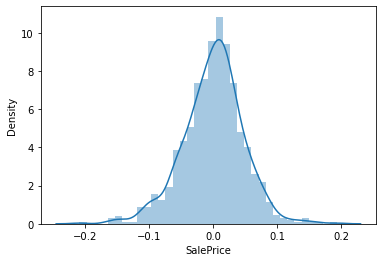

In [149]:
# residual analysis for Linear
res = y_train-ridge_y_pred
sns.distplot(res)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

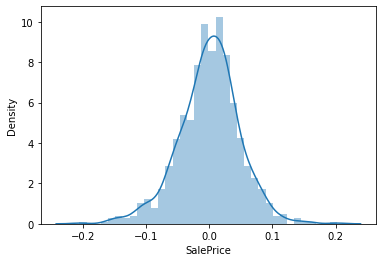

In [150]:
# residual analysis for lasso
res = y_train-lasso_y_pred
sns.distplot(res)

In [151]:
y_prediction_lasso = lasso_regressor.predict(X_test)

In [152]:
y_prediction_ridge = ridge_regressor.predict(X_test)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

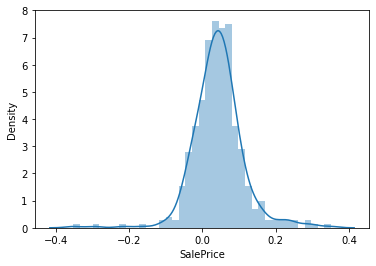

In [153]:
sns.distplot(y_test-y_prediction_lasso)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

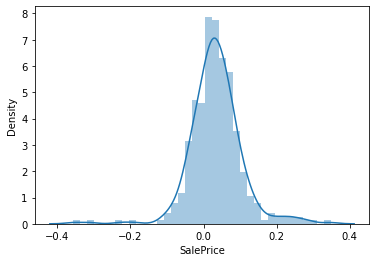

In [154]:
# residual analysis for ridge

sns.distplot(y_test-y_prediction_ridge)

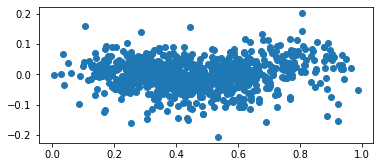

In [155]:
# look for patterns in residuals (we should not be able to identify any patterns)
fig, ax = plt.subplots(figsize = (6,2.5))
_ = ax.scatter(ridge_y_pred,res)

In [156]:
betas = pd.DataFrame(columns = ['Ridge', 'Lasso'], index = X_test.columns)
betas.rows = X_test.columns

betas['Ridge'] = ridge_regressor.best_estimator_.coef_ # Ridge Regression
betas['Lasso'] = lasso_regressor.best_estimator_.coef_ # Lasso Regression
betas

Ridge     Lasso
LotArea                   0.062592  0.059003
OverallQual               0.196985  0.223435
OverallCond               0.121579  0.130126
YearBuilt                 0.063858  0.125868
YearRemodAdd              0.027199  0.025269
BsmtFinSF2               -0.000006 -0.000011
BsmtUnfSF                -0.051996 -0.072175
TotalBsmtSF               0.239354  0.270149
2ndFlrSF                  0.076580  0.047675
GrLivArea                 0.283186  0.343521
BsmtFullBath              0.027940  0.021287
FullBath                  0.029014  0.003173
HalfBath                  0.012722  0.005421
BedroomAbvGr             -0.005189 -0.008105
Fireplaces                0.036730  0.026892
GarageCars                0.119628  0.115144
WoodDeckSF                0.031468  0.027448
OpenPorchSF               0.029184  0.018318
EnclosedPorch             0.006101  0.000000
AgeOfBuilding            -0.063858 -0.007270
MSZoning_FV               0.043754  0.006092
MSZoning_RH               0.059941  0.025212
MSZoning_RL               0.058043  0.026024
MSZoning_RM               0.031042  0.000000
LotShape_IR2              0.017185  0.009931
LotShape_IR3              0.023017  0.000000
LotShape_Reg             -0.001171 -0.001650
LotConfig_CulDSac         0.011171  0.008984
LotConfig_FR2            -0.023925 -0.014629
LotConfig_FR3            -0.032207 -0.015386
LotConfig_Inside         -0.000458  0.000000
Neighborhood_Blueste      0.001662  0.000000
Neighborhood_BrDale       0.028497  0.021708
Neighborhood_BrkSide      0.024814  0.029301
Neighborhood_ClearCr     -0.029878 -0.011509
Neighborhood_CollgCr     -0.012304 -0.003124
Neighborhood_Crawfor      0.062012  0.067170
Neighborhood_Edwards     -0.034517 -0.023118
Neighborhood_Gilbert     -0.032527 -0.017257
Neighborhood_IDOTRR       0.011981  0.010891
Neighborhood_MeadowV     -0.012006 -0.000000
Neighborhood_Mitchel     -0.038022 -0.026912
Neighborhood_NAmes       -0.025274 -0.017143
Neighborhood_NPkVill      0.024273  0.015722
Neighborhood_NWAmes      -0.018301 -0.007943
Neighborhood_NoRidge      0.068496  0.068775
Neighborhood_NridgHt      0.047188  0.049664
Neighborhood_OldTown     -0.017689 -0.010368
Neighborhood_SWISU       -0.012221 -0.000000
Neighborhood_Sawyer      -0.029181 -0.019583
Neighborhood_SawyerW     -0.003824  0.000000
Neighborhood_Somerst      0.057326  0.069140
Neighborhood_StoneBr      0.080618  0.071580
Neighborhood_Timber       0.002082  0.007507
Neighborhood_Veenker      0.020620  0.019366
BldgType_2fmCon          -0.032076 -0.029693
BldgType_Duplex          -0.049828 -0.050610
BldgType_Twnhs           -0.069960 -0.062267
BldgType_TwnhsE          -0.046577 -0.037456
HouseStyle_1.5Unf         0.010588  0.000000
HouseStyle_1Story         0.011851  0.006673
HouseStyle_2.5Fin        -0.059520 -0.061282
HouseStyle_2.5Unf        -0.014435 -0.008299
HouseStyle_2Story         0.000827  0.004907
HouseStyle_SFoyer         0.001170 -0.000000
HouseStyle_SLvl           0.004678  0.000475
RoofStyle_Gable          -0.027369 -0.011055
RoofStyle_Gambrel         0.011717  0.011422
RoofStyle_Hip            -0.020302 -0.007095
RoofStyle_Mansard         0.039536  0.033648
RoofStyle_Shed            0.000000  0.000000
Exterior1st_AsphShn      -0.000575 -0.000000
Exterior1st_BrkComm      -0.049260 -0.022135
Exterior1st_BrkFace       0.060471  0.058039
Exterior1st_CBlock       -0.019870 -0.000000
Exterior1st_CemntBd       0.021422  0.019908
Exterior1st_HdBoard      -0.010417 -0.005535
Exterior1st_ImStucc       0.003585 -0.000000
Exterior1st_MetalSd       0.005882  0.007925
Exterior1st_Plywood       0.001890  0.001925
Exterior1st_Stone         0.039939  0.000000
Exterior1st_Stucco        0.020250  0.020077
Exterior1st_VinylSd      -0.004215 -0.000000
Exterior1st_Wd Sdng      -0.005749 -0.003739
Exterior1st_WdShing      -0.013355 -0.002628
MasVnrType_BrkFace        0.023220  0.005214
MasVnrType_None           0.015649  0.000000
MasVnrType_Stone          0.031878  0.010941
ExterQual_Fa            

### To know the important variables from lasso regression inorder to predict the SalesPrice

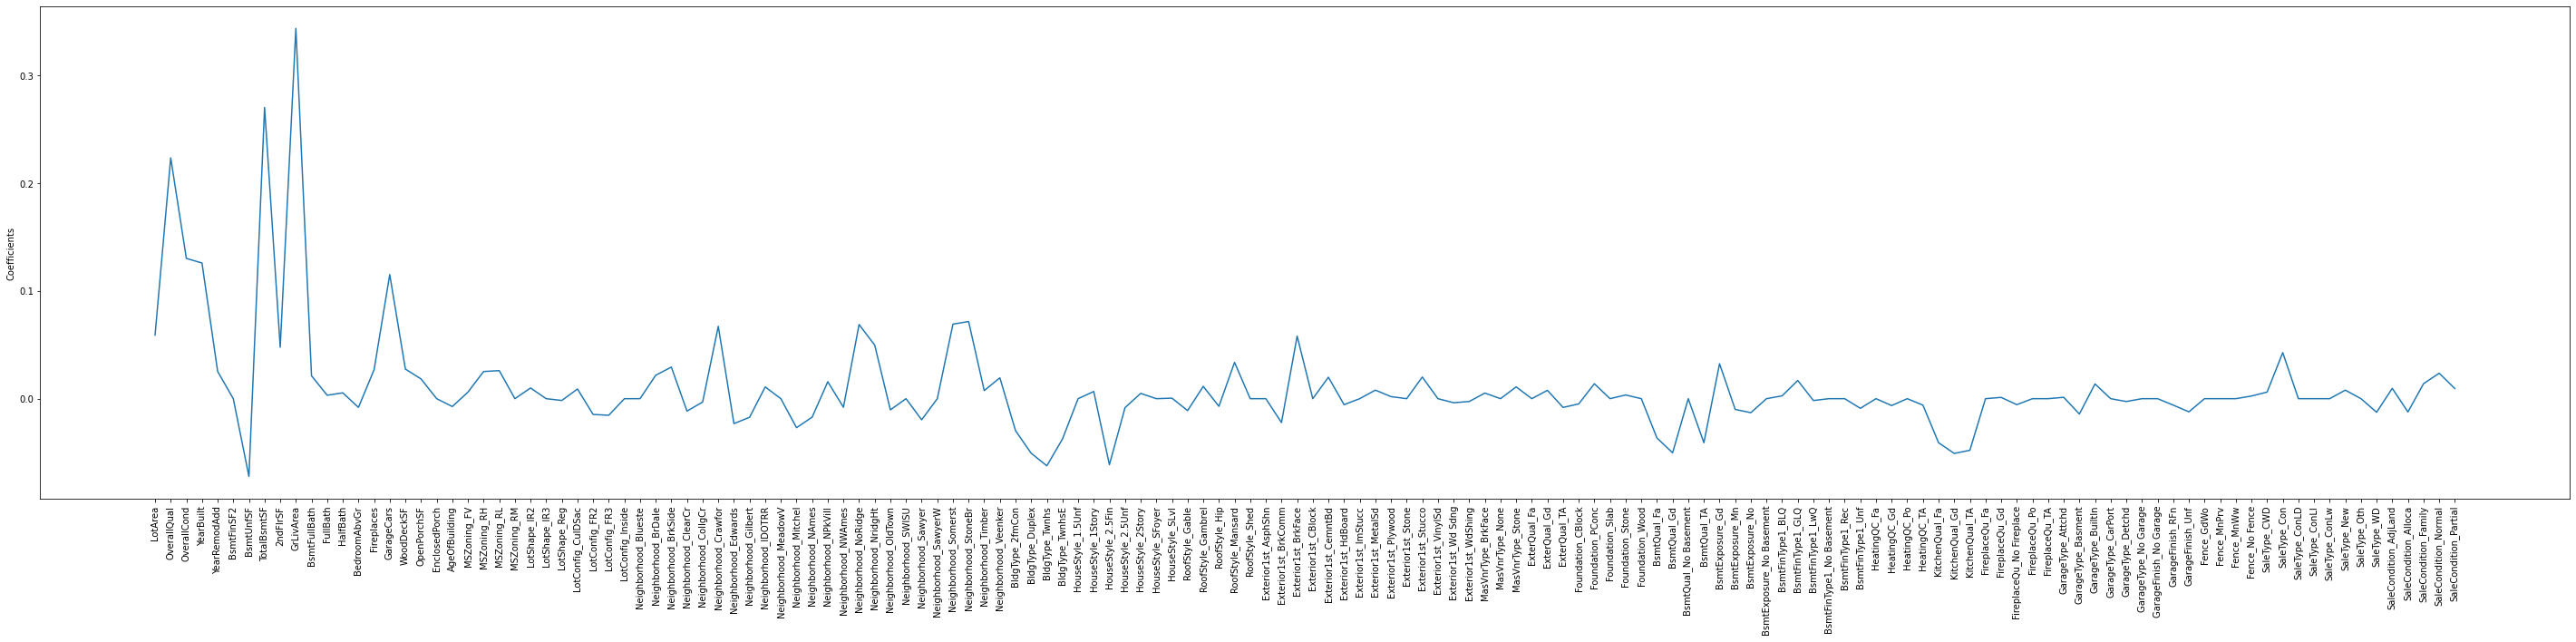

In [157]:
lasso1 = Lasso(alpha = 0.0001)
lasso_coef = lasso1.fit(X_train,y_train).coef_
plt.figure(figsize = (50,10))
_ = plt.plot(range(len(coeff_names)), lasso_coef)
_ = plt.xticks(range(len(coeff_names)), coeff_names, rotation = 90)
_ = plt.ylabel("Coefficients")

plt.show()

In [158]:
# finding the top 10 best variables from lasso model
betas['Lasso'].sort_values(ascending=False)[:10]

GrLivArea               0.343521
TotalBsmtSF             0.270149
OverallQual             0.223435
OverallCond             0.130126
YearBuilt               0.125868
GarageCars              0.115144
Neighborhood_StoneBr    0.071580
Neighborhood_Somerst    0.069140
Neighborhood_NoRidge    0.068775
Neighborhood_Crawfor    0.067170
Name: Lasso, dtype: float64

In [159]:
# finding the top 10 best variables from ridge model

betas['Ridge'].sort_values(ascending=False)[:10]

GrLivArea               0.283186
TotalBsmtSF             0.239354
OverallQual             0.196985
OverallCond             0.121579
GarageCars              0.119628
Neighborhood_StoneBr    0.080618
2ndFlrSF                0.076580
Neighborhood_NoRidge    0.068496
YearBuilt               0.063858
LotArea                 0.062592
Name: Ridge, dtype: float64

### Assignment Part-II

#### Question : 1 - What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

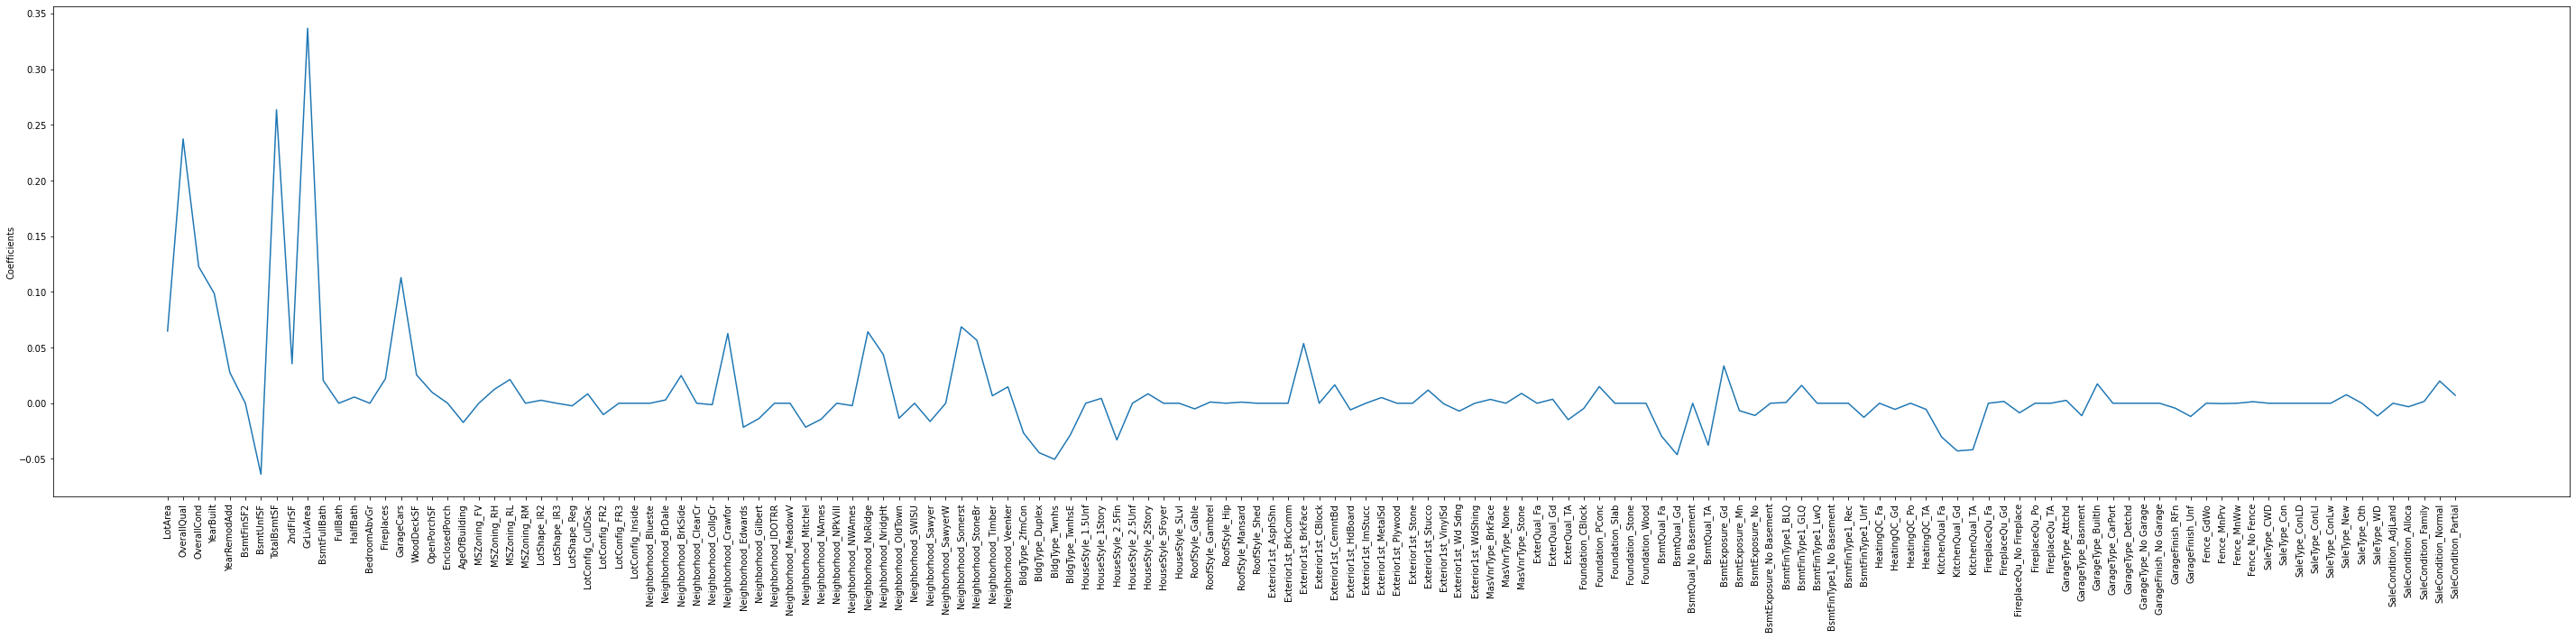

In [160]:
lasso1 = Lasso(alpha = 0.0002)
lasso_coef = lasso1.fit(X_train,y_train).coef_
plt.figure(figsize = (50,10))
_ = plt.plot(range(len(coeff_names)), lasso_coef)
_ = plt.xticks(range(len(coeff_names)), coeff_names, rotation = 90)
_ = plt.ylabel("Coefficients")

plt.show()

In [161]:
betas_a1 = pd.DataFrame(columns = ['Ridge', 'Lasso'], index = X_test.columns)
betas_a1.rows = X_test.columns



In [162]:
betas_a1['Lasso'] = lasso_coef
betas_a1['Lasso'].sort_values(ascending = False)[:10]

GrLivArea               0.336654
TotalBsmtSF             0.263436
OverallQual             0.237323
OverallCond             0.122696
GarageCars              0.112816
YearBuilt               0.098529
Neighborhood_Somerst    0.068622
LotArea                 0.064826
Neighborhood_NoRidge    0.064117
Neighborhood_Crawfor    0.062592
Name: Lasso, dtype: float64

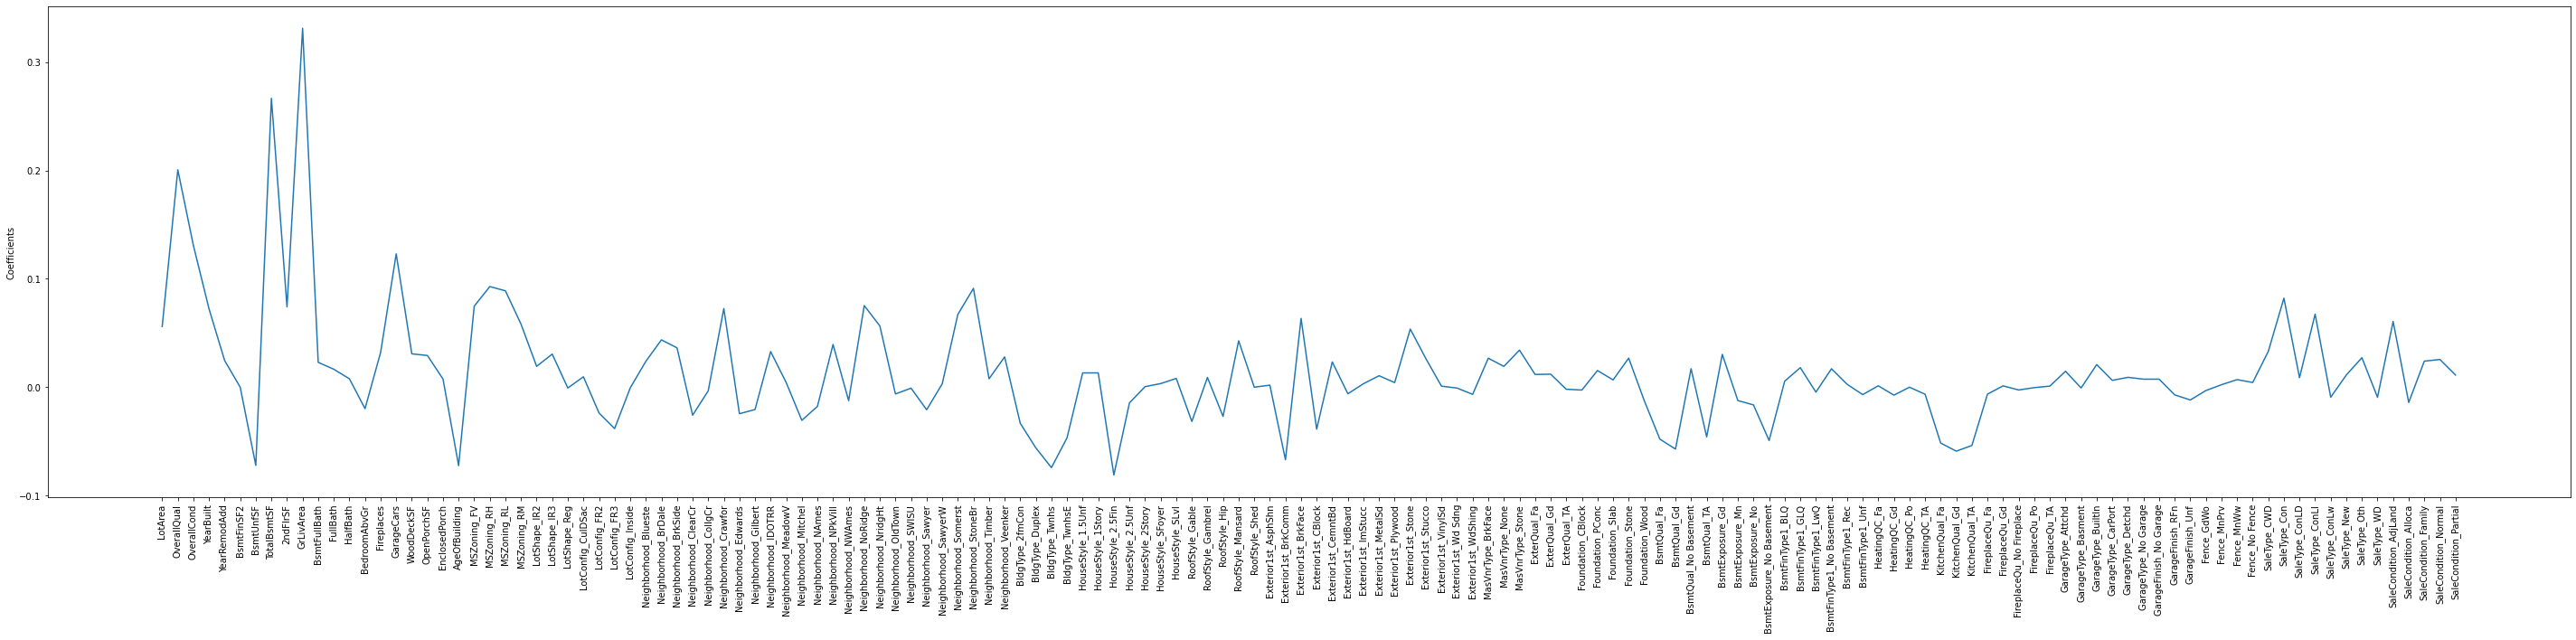

In [163]:
ridge1 = Ridge(alpha = 0.2)
ridge1_coef = ridge1.fit(X_train,y_train).coef_
plt.figure(figsize = (50,10))
_ = plt.plot(range(len(coeff_names)), ridge1_coef)
_ = plt.xticks(range(len(coeff_names)), coeff_names, rotation = 90)
_ = plt.ylabel("Coefficients")

plt.show()

In [164]:
betas_a1['Ridge'] = ridge1_coef
betas_a1['Ridge'].sort_values(ascending = False)[:10]

GrLivArea               0.331268
TotalBsmtSF             0.266605
OverallQual             0.200655
OverallCond             0.130759
GarageCars              0.123107
MSZoning_RH             0.092882
Neighborhood_StoneBr    0.091234
MSZoning_RL             0.088954
SaleType_Con            0.082169
Neighborhood_NoRidge    0.075295
Name: Ridge, dtype: float64

In [165]:
# checking r2_score for ridge model after doubling the alpha value on training set

ridge1_y_pred = ridge1.predict(X_train)
r2_score(y_train , ridge1_y_pred)

0.9426981483186524

In [166]:
# checking r2_score for ridge model after doubling the alpha value on test set

ridge1_y_pred = ridge1.predict(X_test)
r2_score(y_test , ridge1_y_pred)

0.8403455267774022

In [167]:
# checking r2_score for lasso model after doubling the alpha value on training set

lasso1_y_pred = lasso1.predict(X_train)
r2_score(y_train , lasso1_y_pred)

0.9353781461978251

In [168]:
# checking r2_score for lasso model after doubling the alpha value on test set

lasso1_y_pred = lasso1.predict(X_test)
r2_score(y_test , lasso1_y_pred)

0.8267265506351814

- Alpha for Lasso: 0.0001
- As per the question, if alpha for Lasso is doubled then 0.0002
- If the alpha is doubled in the Lasso then r2_score for both training set is same. Also r2_score for test is decreased when Alpha is doubled.

- Alpha for Ridge: 0.1
- As per the question, if alpha for Ridge is doubled then 0.2
- If the alpha is doubled in the Ridge then r2_score for both training and test set is same.

#### Question - 2 - You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

- Alpha for Lasso: 0.0001
- Alpha for Ridge : 0.1
- Choosing between ridge and lasso completely depends on the output that we need.
- If we want to choose only the columns where the coefficients are not zero then we go for Lasso regression.
- If we have more number of predictor variables than the number of observations then ridge will the best technique 


#### Question 3 - After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [169]:
# dropping the top 5 important features from the dataset 
X_train_new = X_train.drop(['GrLivArea','TotalBsmtSF','OverallQual','OverallCond','YearBuilt'], axis = 1)

In [170]:
X_train_new.head()

LotArea  YearRemodAdd  BsmtFinSF2  BsmtUnfSF  2ndFlrSF  BsmtFullBath  \
1093  0.480415      0.800000           0   0.099412  0.000000           0.5   
60    0.718915      0.900000           0   0.106268  0.000000           0.5   
740   0.503383      0.866667           0   0.129285  0.412166           0.0   
369   0.517661      0.933333         258   0.358962  0.000000           0.5   
466   0.567198      0.333333           0   0.244368  0.000000           0.5   

      FullBath  HalfBath  BedroomAbvGr  Fireplaces  GarageCars  WoodDeckSF  \
1093  0.333333       0.5      0.166667    0.000000         0.5    0.000000   
60    0.333333       0.5      0.500000    0.000000         0.5    0.000000   
740   0.666667       0.0      0.333333    0.000000         0.5    0.468750   
369   0.333333       0.0      0.500000    0.333333         0.5    0.631944   
466   0.333333       0.0      0.333333    0.333333         0.5    0.000000   

      OpenPorchSF  EnclosedPorch  AgeOfBuilding  MSZoning_FV  MSZoning_RH  \
1093     0.117002       0.000000       0.328358            0            0   
60       0.091408       0.000000       0.037313            0            0   
740      0.000000       0.290155       0.738806            0            0   
369      0.031079       0.000000       0.373134            0            0   
466      0.000000       0.000000       0.291045            0            0   

      MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
1093            1            0             0             0             1   
60              1            0             0             0             1   
740             0            1             0             0             1   
369             1            0             0             0             0   
466             1            0             0             0             1   

      LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
1093                  0              0              0                 0   
60                    0              0              0                 1   
740                   0              0              0                 1   
369                   0              0              0                 0   
466                   0              0              0                 1   

      Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
1093                     0                    0                     0   
60                       0                    0                     0   
740                      0                    0                     0   
369                      0                    0                     0   
466                      0                    0                     0   

      Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
1093                     0                     0                     0   
60                       0                     0                     0   
740                      0                     0                     0   
369                      0                     0                     0   
466                      0                     0                     0   

      Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
1093                     0                     0                    0   
60                       0                     0                    0   
740                      0                     0                    0   
369                      0                     0                    0   
466                      0                     0                    0   

      Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  \
1093                     0                     0                   1   
60                       0                     0                   0   
740                      0                     0                   0   
369                      0                     0                   1   
466      

In [171]:
# building Lasso regression again after removing the variables
lasso_new = Lasso()
parameters = {'alpha' : [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                        2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}
lasso_regressor_new = GridSearchCV(lasso_new, parameters,scoring = 'neg_mean_squared_error', cv = 5)
lasso_regressor_new.fit(X_train_new, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             scoring='neg_mean_squared_error')

In [172]:
print(lasso_regressor_new.best_params_)
print(lasso_regressor_new.best_score_)

{'alpha': 0.0001}
-0.005285014854726579


In [173]:
# building the lasso model again

lasso_new_coef = lasso_regressor_new.best_estimator_.coef_


In [174]:
betas_a2 = pd.DataFrame(columns = ['Lasso'], index = X_train_new.columns)
betas_a2.rows = X_train_new.columns

In [175]:
betas_a2.shape

(143, 1)

In [176]:
betas_a2['Lasso'] = lasso_new_coef
betas_a2['Lasso'].sort_values(ascending = False)[:10]

Exterior1st_Stone       0.191017
GarageCars              0.183373
2ndFlrSF                0.169693
Neighborhood_StoneBr    0.158999
Fireplaces              0.102530
LotArea                 0.101267
Neighborhood_NoRidge    0.100398
FullBath                0.089364
Neighborhood_Crawfor    0.088970
BedroomAbvGr            0.081152
Name: Lasso, dtype: float64

- After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?
- Before with alpha = 0.001, the top 5 variables in lasso regression are below : 
    - GrLivArea       
    - TotalBsmtSF     
    - OverallQual      
    - OverallCond      
    - YearBuilt         

- After removing these variables, again if we build the lasso model again then the below are the 5 important predictor variables:
    - Exterior1st_Stone      
    - GarageCars 
    - 2ndFlrSF 
    - Neighborhood_StoneBr            
    - Fireplaces                      

#### Question 4 - How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

- Model should not be overfitting or under fitting.
- It should not be the case that model performs well on the training data set where as it fails to predict the test dataset
- Model should be able to generalise the unseen data
- Too complex model will have high accuracy
- To make model more generalisable and robost we need to decrease the variance which lead to bias.